# Определение перспективного тарифа для телеком компании

## ОГЛАВЛЕНИЕ

1. [Описание проекта](#projekt) 
2. [Цель и задачи проекта](#purpose)   
3. [Описание тарифов](#tariffs)   
4. [Описание данных](#data)    
5. [Открытие данных и изучение общей информации](#start)
6. [Предобработка данных](#preprocessing)   
7. [Подготовка данных](#preparation)   
8. [Анализ данных](#analysis)
9. [Проверка гипотез](#hypothesis)
10. [Общий вывод](#conclusion)
11. [Рекомендации](#recommendations)

### Описание проекта
<a name="projekt"></a>

В компании «Мегалайн» — федеральном операторе сотовой связи - клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.   
Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

### Цель и задачи проекта
<a name="purpose"></a>

Цель проекта - проанализировать поведение клиентов и сделать вывод — какой тариф лучше.   
Для этого необходимо:  
1. Посчитать для каждого пользователя:   
 * количество сделанных звонков и израсходованных минут разговора по месяцам;
 * количество отправленных сообщений по месяцам;
 * объем израсходованного интернет-трафика по месяцам;
 * помесячную выручку с каждого пользователя.   
2. Описать поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитать среднее количество, дисперсию и стандартное отклонение, построить гистограммы, описать распределения.
3. Проверить гипотезы:
 * средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
 * средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

### Описание тарифов
<a name="tariffs"></a>

#### Тариф «Смарт»

Ежемесячная плата: 550 рублей   

Включено:   
- 500 минут разговора   
- 50 сообщений   
- 15 Гб интернет-трафика   

Стоимость услуг сверх тарифного пакета:   
- минута разговора: 3 рубля   
- сообщение: 3 рубля   
- 1 Гб интернет-трафика: 200 рублей

#### Тариф «Ультра»

Ежемесячная плата: 1950 рублей   

Включено:   
- 3000 минут разговора   
- 1000 сообщений    
- 30 Гб интернет-трафика   

Стоимость услуг сверх тарифного пакета:   
- минута разговора: 1 рубль   
- сообщение: 1 рубль   
- 1 Гб интернет-трафика: 150 рублей

### Описание данных
<a name="data"></a>

#### Таблица users (информация о пользователях)

- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

#### Таблица calls (информация о звонках)

- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

#### Таблица messages (информация о сообщениях)

- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

#### Таблица internet (информация об интернет-сессиях)

- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

#### Таблица tariffs (информация о тарифах)

- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### Открытие данных и изучение общей информации
<a name="start"></a>

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import matplotlib
matplotlib.style.use('seaborn-whitegrid')
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
# прочитаем DataFrame
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

#### Таблица users (информация о пользователях)

In [4]:
# выведем на экран 10 случайных строк таблицы
users.sample(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
445,1445,40,NaN,Москва,Рауль,Иванов,2018-12-29,smart
462,1462,72,NaN,Тольятти,Алёна,Абрамычева,2018-10-29,smart
37,1037,73,NaN,Череповец,Изольда,Архипова,2018-10-13,smart
55,1055,39,NaN,Казань,Луиза,Березина,2018-01-02,smart
41,1041,58,NaN,Москва,Михаил,Кравцов,2018-11-29,smart
93,1093,73,NaN,Санкт-Петербург,Вероника,Лапина,2018-06-29,smart
177,1177,75,NaN,Новосибирск,Лолита,Аничкина,2018-06-19,smart
74,1074,68,NaN,Якутск,Андрей,Кравцов,2018-12-30,smart
120,1120,25,NaN,Краснодар,Агнесса,Абдулина,2018-01-24,ultra
451,1451,58,NaN,Набережные Челны,Виктория,Завьялова,2018-08-27,smart


In [5]:
# проведем базовую проверку столбцов таблицы с количественными переменными 
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [6]:
# проведем базовую проверку столбцов таблицы с категориальными переменными 
for column in users.columns:
    if users[column].dtype == 'object':        
        print(column)
        print()
        print(users[column].describe())
        print()
        print(users[column].unique())
        print()
        print()

churn_date

count             38
unique            33
top       2018-10-14
freq               2
Name: churn_date, dtype: object

[nan '2018-10-05' '2018-12-18' '2018-11-21' '2018-10-03' '2018-10-14'
 '2018-12-09' '2018-12-11' '2018-12-26' '2018-08-31' '2018-12-03'
 '2018-12-23' '2018-11-07' '2018-12-16' '2018-12-20' '2018-11-30'
 '2018-12-21' '2018-08-17' '2018-09-02' '2018-10-04' '2018-11-13'
 '2018-11-22' '2018-10-28' '2018-11-26' '2018-11-27' '2018-11-16'
 '2018-10-27' '2018-12-30' '2018-09-27' '2018-12-25' '2018-12-14'
 '2018-12-24' '2018-09-26' '2018-10-25']


city

count        500
unique        76
top       Москва
freq          99
Name: city, dtype: object

['Краснодар' 'Москва' 'Стерлитамак' 'Новокузнецк' 'Набережные Челны'
 'Ульяновск' 'Челябинск' 'Пермь' 'Тюмень' 'Самара' 'Санкт-Петербург'
 'Иваново' 'Чебоксары' 'Омск' 'Уфа' 'Томск' 'Чита' 'Мурманск'
 'Петрозаводск' 'Тверь' 'Екатеринбург' 'Махачкала' 'Вологда' 'Череповец'
 'Ярославль' 'Сочи' 'Хабаровск' 'Ставрополь' 'Рязань' 

In [7]:
# посмотрим сводную информацию таблицы
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


#### Таблица calls (информация о звонках)

In [8]:
# выведем на экран 10 случайных строк таблицы
calls.sample(10)

,id,call_date,duration,user_id
13739,1035_426,2018-04-29,8.25,1035
48141,1120_242,2018-12-02,8.84,1120
28978,1072_304,2018-04-25,0.00,1072
45097,1113_513,2018-06-20,0.54,1113
16930,1046_292,2018-09-27,0.82,1046
10952,1028_255,2018-12-15,0.00,1028
77439,1193_701,2018-06-20,8.60,1193
146831,1374_265,2018-10-07,14.62,1374
87986,1220_71,2018-12-31,3.76,1220
84190,1210_65,2018-10-07,15.92,1210


In [9]:
# проведем базовую проверку столбцов таблицы с количественными переменными 
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [10]:
# проведем базовую проверку столбцов таблицы с категориальными переменными 
for column in calls.columns:
    if calls[column].dtype == 'object':        
        print(column)
        print()
        print(calls[column].describe())
        print()
        print(calls[column].unique())
        print()
        print()

id

count       202607
unique      202607
top       1201_119
freq             1
Name: id, dtype: object

['1000_0' '1000_1' '1000_2' ... '1499_217' '1499_218' '1499_219']


call_date

count         202607
unique           365
top       2018-12-31
freq            1435
Name: call_date, dtype: object

['2018-07-25' '2018-08-17' '2018-06-11' '2018-09-21' '2018-12-15'
 '2018-11-02' '2018-10-18' '2018-08-22' '2018-09-15' '2018-08-15'
 '2018-05-28' '2018-07-05' '2018-09-29' '2018-12-11' '2018-07-27'
 '2018-08-11' '2018-08-02' '2018-06-15' '2018-12-04' '2018-08-20'
 '2018-09-25' '2018-07-21' '2018-08-27' '2018-08-25' '2018-12-12'
 '2018-07-19' '2018-11-14' '2018-12-26' '2018-12-02' '2018-10-08'
 '2018-09-23' '2018-10-09' '2018-05-25' '2018-06-13' '2018-10-25'
 '2018-12-29' '2018-07-12' '2018-11-20' '2018-06-05' '2018-10-13'
 '2018-06-26' '2018-07-14' '2018-07-20' '2018-12-01' '2018-06-17'
 '2018-10-24' '2018-11-26' '2018-09-19' '2018-05-30' '2018-12-21'
 '2018-12-23' '2018-07-03' '2018-10-04' 

In [11]:
# посмотрим сводную информацию таблицы
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


#### Таблица messages (информация о сообщениях)

In [12]:
# выведем на экран 10 случайных строк таблицы
messages.sample(10)

,id,message_date,user_id
113960,1464_94,2018-12-17,1464
110947,1449_288,2018-07-28,1449
73341,1310_210,2018-05-14,1310
6872,1028_527,2018-11-08,1028
12181,1052_253,2018-12-27,1052
16155,1068_40,2018-07-16,1068
108006,1433_613,2018-01-09,1433
116831,1475_35,2018-11-15,1475
55626,1245_136,2018-11-12,1245
11666,1048_312,2018-11-13,1048


In [13]:
# проведем базовую проверку столбцов таблицы с количественными переменными 
messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [14]:
# проведем базовую проверку столбцов таблицы с категориальными переменными 
for column in messages.columns:
    if messages[column].dtype == 'object':        
        print(column)
        print()
        print(messages[column].describe())
        print()
        print(messages[column].unique())
        print()
        print()

id

count       123036
unique      123036
top       1386_131
freq             1
Name: id, dtype: object

['1000_0' '1000_1' '1000_2' ... '1499_181' '1499_182' '1499_183']


message_date

count         123036
unique           364
top       2018-12-31
freq             859
Name: message_date, dtype: object

['2018-06-27' '2018-10-08' '2018-08-04' '2018-06-16' '2018-12-05'
 '2018-06-20' '2018-11-19' '2018-10-29' '2018-06-25' '2018-12-18'
 '2018-05-30' '2018-07-06' '2018-08-20' '2018-10-30' '2018-09-14'
 '2018-08-28' '2018-06-29' '2018-07-07' '2018-05-29' '2018-05-28'
 '2018-08-15' '2018-07-29' '2018-12-07' '2018-12-25' '2018-10-31'
 '2018-07-30' '2018-11-05' '2018-12-15' '2018-12-04' '2018-06-30'
 '2018-12-22' '2018-10-02' '2018-08-29' '2018-09-09' '2018-07-19'
 '2018-09-04' '2018-07-15' '2018-10-25' '2018-12-08' '2018-06-01'
 '2018-06-12' '2018-12-21' '2018-10-07' '2018-08-30' '2018-06-04'
 '2018-10-01' '2018-06-22' '2018-10-12' '2018-10-15' '2018-10-24'
 '2018-09-20' '2018-08-22' '2018-0

In [15]:
# посмотрим сводную информацию таблицы
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


#### Таблица internet (информация об интернет-сессиях)

In [16]:
# выведем на экран 10 случайных строк таблицы
internet.sample(10)

,Unnamed: 0,id,mb_used,session_date,user_id
79473,79473,1267_107,462.69,2018-09-04,1267
105091,105091,1356_90,377.32,2018-12-29,1356
85440,85440,1290_470,262.95,2018-08-16,1290
11510,11510,1040_133,453.88,2018-06-26,1040
20992,20992,1071_109,739.16,2018-03-11,1071
67681,67681,1229_11,244.80,2018-12-22,1229
84596,84596,1287_151,0.00,2018-09-28,1287
21480,21480,1072_203,30.43,2018-11-02,1072
76620,76620,1257_131,547.18,2018-10-17,1257
101001,101001,1338_391,551.11,2018-11-27,1338


In [17]:
# проведем базовую проверку столбцов таблицы с количественными переменными 
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [18]:
# проведем базовую проверку столбцов таблицы с категориальными переменными 
for column in internet.columns:
    if internet[column].dtype == 'object':        
        print(column)
        print()
        print(internet[column].describe())
        print()
        print(internet[column].unique())
        print()
        print()

id

count       149396
unique      149396
top       1480_175
freq             1
Name: id, dtype: object

['1000_0' '1000_1' '1000_2' ... '1499_154' '1499_155' '1499_156']


session_date

count         149396
unique           365
top       2018-12-31
freq            1057
Name: session_date, dtype: object

['2018-11-25' '2018-09-07' '2018-06-25' '2018-08-22' '2018-09-24'
 '2018-10-02' '2018-07-11' '2018-10-08' '2018-09-03' '2018-09-27'
 '2018-08-28' '2018-06-20' '2018-08-09' '2018-08-11' '2018-07-21'
 '2018-06-09' '2018-06-03' '2018-11-01' '2018-11-28' '2018-08-20'
 '2018-12-06' '2018-07-02' '2018-10-19' '2018-10-30' '2018-06-17'
 '2018-11-06' '2018-09-14' '2018-11-15' '2018-08-26' '2018-10-15'
 '2018-11-27' '2018-10-17' '2018-10-07' '2018-08-05' '2018-07-06'
 '2018-10-03' '2018-11-02' '2018-06-30' '2018-11-17' '2018-06-06'
 '2018-11-20' '2018-05-31' '2018-10-29' '2018-12-10' '2018-07-04'
 '2018-12-28' '2018-05-28' '2018-09-15' '2018-09-09' '2018-09-17'
 '2018-09-01' '2018-11-03' '2018-1

In [19]:
# посмотрим сводную информацию таблицы
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


#### Таблица tariffs (информация о тарифах)

In [20]:
# выведем на экран таблицу
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [21]:
# посмотрим сводную информацию таблицы
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


### Вывод

При изучении таблиц с данными установлены следующие проблемы:

1. Таблица `users` (информация о пользователях):
    - в столбцах `reg_date`  и `churn_date` даты подключения тарифа и прекращения пользования тарифом указаны не в формате `datetime`;
    - в столбце `churn_date` имеются пропущенные значения даты прекращения пользования тарифом. 
2. Таблица `calls` (информация о звонках):
    - в столбце `duration` значения длительности звонка относятся к вещественному типу, а не целочисленному;
    - в столбце `duration` имеются значения с нулевой длительностью звонка;
    - в столбце `id` значения уникального номера звонка относятся к строковому типу, а не целочисленному;
    - в столбце `call_date` даты звонка указаны не в формате `datetime`.
3. Таблица `messages` (информация о сообщениях):
    - в столбце `id` значения уникального номера сообщения относятся к строковому типу, а не целочисленному;
    - в столбце `message_date` даты сообщения указаны не в формате `datetime`.
4. Таблица `internet` (информация об интернет-сессиях):
    - столбец `Unnamed: 0` дублирует индексы таблицы;
    - в столбце `mb_used` значения потраченного за сессию интернет-трафика относятся к вещественному типу, а не целочисленному;
    - в столбце `id` значения уникального номера сессии относятся к строковому типу, а не целочисленному;
    - в столбце `session_date` даты интернет-сессий указаны не в формате `datetime`.
5. Таблица `tariffs` (информация о тарифах):
    - cтолбцы с названием тарифа в таблицах `users` и `tariffs` имеют разное наименование.
  
**Учитывая выявленные проблемы с предоставленными данными, необходимо произвести их предобработку.** 

### Предобработка данных
<a name="preprocessing"></a>

#### Таблица users (информация о пользователях)

In [22]:
# приведем значения даты подключения тарифа и прекращения пользования тарифом к формату "datetime"
users['reg_date']= pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
users['churn_date']= pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [23]:
# посчитаем количество дубликатов
users.duplicated().sum()

0

#### Таблица calls (информация о звонках)

«Мегалайн» всегда округляет вверх значения минут, следовательно необходимо округлить длительность звонков в большую сторону.

In [24]:
# округлим значения длительности звонка и приведем их целому числу
calls['duration'] = calls['duration'].apply(np.ceil)\
                                     .astype('int')
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
5,1000_5,2018-11-02,0,1000
6,1000_6,2018-10-18,0,1000
7,1000_7,2018-08-22,19,1000
8,1000_8,2018-09-15,19,1000
9,1000_9,2018-08-15,0,1000


In [25]:
# посчитаем общую длительность звонков
calls['duration'].sum()

1450301

Длительность многих звонков — 0.0 минут. Это пропущенные звонки. Так как пропущенные звонки не входят в количество минут разговора в месяц, включённых в абонентскую плату, их отсутствие не повлияет на результаты анализа, следовательно строки с ними необходимо удалить.


In [26]:
# удалим строки с нулевой длительностью звонка
calls = calls.query('duration != 0')\
             .reset_index(drop = True)
calls.head(10)

,id,call_date,duration,user_id
0,1000_2,2018-06-11,3,1000
1,1000_3,2018-09-21,14,1000
2,1000_4,2018-12-15,6,1000
3,1000_7,2018-08-22,19,1000
4,1000_8,2018-09-15,19,1000
5,1000_10,2018-08-22,6,1000
6,1000_11,2018-05-28,19,1000
7,1000_12,2018-07-05,3,1000
8,1000_13,2018-09-29,8,1000
9,1000_14,2018-12-11,10,1000


In [27]:
# приведем значения даты звонка к формату "datetime", а уникального номера звонка к целому числу
calls['call_date']= pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls['id'] = calls['id'].astype('int')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162994 entries, 0 to 162993
Data columns (total 4 columns):
id           162994 non-null int64
call_date    162994 non-null datetime64[ns]
duration     162994 non-null int64
user_id      162994 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.0 MB


In [28]:
# посчитаем количество дубликатов
calls.duplicated().sum()

0

#### Таблица messages (информация о сообщениях)

In [29]:
# приведем значения даты сообщения к формату "datetime", а уникального номера сообщения к целому числу
messages['message_date']= pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
messages['id'] = messages['id'].astype('int')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null int64
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.8 MB


In [30]:
# посчитаем общее количество сообщений
messages['id'].count()

123036

In [31]:
# посчитаем количество дубликатов
messages.duplicated().sum()

0

#### Таблица internet (информация об интернет-сессиях)

In [32]:
# удалим столбец 'Unnamed: 0'
internet = internet.drop('Unnamed: 0', axis = 1)

«Мегалайн» всегда округляет вверх значения мегабайтов, следовательно необходимо округлить потраченный за сессию интернет-трафик в большую сторону.

In [33]:
# округлим значения потраченного за сессию интернет-трафика и приведем их целому числу
internet['mb_used'] = internet['mb_used'].apply(np.ceil)\
                                         .astype('int')
internet.head(10)

,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000
5,1000_5,400,2018-10-02,1000
6,1000_6,541,2018-09-07,1000
7,1000_7,416,2018-07-11,1000
8,1000_8,506,2018-10-08,1000
9,1000_9,346,2018-09-03,1000


In [34]:
# приведем значения даты интернет-сессий к формату "datetime", а уникального номера сессии
# к целому числу
internet['session_date']= pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
internet['id'] = internet['id'].astype('int')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null int64
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 4.6 MB


In [35]:
# посчитаем общий объем потраченного интернет-трафика
internet['mb_used'].sum()

55369459

In [36]:
# посчитаем количество дубликатов
internet.duplicated().sum()

0

#### Таблица tariffs (информация о тарифах)

In [37]:
# переименуем столбец таблицы
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})

### Вывод

В целях предобработки данных провели следующую работу:  
1. Таблица `users` (информация о пользователях):
    - для возможности использования в анализе значения даты подключения тарифа и прекращения пользования тарифом привели к формату `datetime`;
    - пропущенные значения даты прекращения пользования тарифом означают продолжение пользования соответствующим тарифным планом, поэтому заменять или удалять строки с пропущенными значениями не следует. 
2. Таблица `calls` (информация о звонках):
    - «Мегалайн» всегда округляет вверх значения минут, в связи с чем  длительность звонков округлили в большую сторону;
    - для удобства расчетов значения длительности звонка и  уникального номера звонка привели к целочисленному формату;
    - так как  пропущенные звонки (длительностью  0.0 минут) не входят в количество минут разговора в месяц, включённых в абонентскую плату, строки с ними удалили;
    - для возможности использования в анализе значения даты звонка привели к формату `datetime`.
3. Таблица `messages` (информация о сообщениях):
    - для удобства расчетов значения уникального номера сообщения привели к целочисленному формату;
    - для возможности использования в анализе значения даты сообщения привели к формату `datetime`.
4. Таблица `internet` (информация об интернет-сессиях):
    - поскольку столбец `Unnamed: 0` дублирует индексы таблицы, удалили его;
    - «Мегалайн» всегда округляет вверх значения мегабайтов, в связи с чем потраченный за сессию интернет-трафик округлили в большую сторону;
    - для удобства расчетов значения потраченного за сессию интернет-трафика и уникального номера сессии привели к целочисленному формату;
    - для возможности использования в анализе значения даты интернет-сессии привели к формату `datetime`.
5. Таблица `tariffs` (информация о тарифах):
    - заменили наименование столбца с названием тарифа.

**Предобработка данных завершена.**

### Подготовка данных
<a name="preparation"></a>

In [38]:
# создадим столбец с месяцем совершения звонка
calls['month'] = calls['call_date'].values.astype('datetime64[M]')
calls.head(10)

,id,call_date,duration,user_id,month
0,10002,2018-06-11,3,1000,2018-06-01
1,10003,2018-09-21,14,1000,2018-09-01
2,10004,2018-12-15,6,1000,2018-12-01
3,10007,2018-08-22,19,1000,2018-08-01
4,10008,2018-09-15,19,1000,2018-09-01
5,100010,2018-08-22,6,1000,2018-08-01
6,100011,2018-05-28,19,1000,2018-05-01
7,100012,2018-07-05,3,1000,2018-07-01
8,100013,2018-09-29,8,1000,2018-09-01
9,100014,2018-12-11,10,1000,2018-12-01


In [39]:
# посчитаем для каждого пользователя количество совершенных звонков
# и израсходованных минут разговора в месяц
calls_pivot = calls.groupby(['user_id', 'month'])\
                   .agg({'id':'count', 'duration':'sum'})\
                   .reset_index()\
                   .rename(columns = {'id':'number_of_calls_month',
                                      'duration':'duration_of_calls_month'})
calls_pivot.head(10)

,user_id,month,number_of_calls_month,duration_of_calls_month
0,1000,2018-05-01,17,159
1,1000,2018-06-01,28,172
2,1000,2018-07-01,41,340
3,1000,2018-08-01,42,408
4,1000,2018-09-01,46,466
5,1000,2018-10-01,44,350
6,1000,2018-11-01,37,338
7,1000,2018-12-01,38,333
8,1001,2018-11-01,45,430
9,1001,2018-12-01,47,414


In [40]:
# проверим общую длительность звонков
calls_pivot['duration_of_calls_month'].sum()

1450301

In [41]:
# создадим столбец с месяцем отправления сообщения
messages['month'] = messages['message_date'].values.astype('datetime64[M]')
messages.head(10)

,id,message_date,user_id,month
0,10000,2018-06-27,1000,2018-06-01
1,10001,2018-10-08,1000,2018-10-01
2,10002,2018-08-04,1000,2018-08-01
3,10003,2018-06-16,1000,2018-06-01
4,10004,2018-12-05,1000,2018-12-01
5,10005,2018-06-20,1000,2018-06-01
6,10006,2018-11-19,1000,2018-11-01
7,10007,2018-10-29,1000,2018-10-01
8,10008,2018-06-25,1000,2018-06-01
9,10009,2018-12-18,1000,2018-12-01


In [42]:
# посчитаем для каждого пользователя количество отправленных сообщений в месяц
messages_pivot = messages.groupby(['user_id', 'month'])\
                         ['id'].count()\
                         .reset_index()\
                         .rename(columns = {'id':'number_of_messages_month'})
messages_pivot.head(10)

,user_id,month,number_of_messages_month
0,1000,2018-05-01,22
1,1000,2018-06-01,60
2,1000,2018-07-01,75
3,1000,2018-08-01,81
4,1000,2018-09-01,57
5,1000,2018-10-01,73
6,1000,2018-11-01,58
7,1000,2018-12-01,70
8,1002,2018-06-01,4
9,1002,2018-07-01,11


In [43]:
# проверим общее количество сообщений
messages_pivot['number_of_messages_month'].sum()

123036

In [44]:
# создадим столбец с месяцем интернет-сессии
internet['month'] = internet['session_date'].values.astype('datetime64[M]')
internet.head(10)

,id,mb_used,session_date,user_id,month
0,10000,113,2018-11-25,1000,2018-11-01
1,10001,1053,2018-09-07,1000,2018-09-01
2,10002,1198,2018-06-25,1000,2018-06-01
3,10003,551,2018-08-22,1000,2018-08-01
4,10004,303,2018-09-24,1000,2018-09-01
5,10005,400,2018-10-02,1000,2018-10-01
6,10006,541,2018-09-07,1000,2018-09-01
7,10007,416,2018-07-11,1000,2018-07-01
8,10008,506,2018-10-08,1000,2018-10-01
9,10009,346,2018-09-03,1000,2018-09-01


In [45]:
# посчитаем для каждого пользователя объем потраченного интернет-трафика в месяц
internet_pivot = internet.groupby(['user_id', 'month'])\
                         ['mb_used'].sum()\
                         .reset_index()\
                         .rename(columns = {'mb_used':'mb_used_month'})
internet_pivot.head(10)

,user_id,month,mb_used_month
0,1000,2018-05-01,2256
1,1000,2018-06-01,23257
2,1000,2018-07-01,14016
3,1000,2018-08-01,14070
4,1000,2018-09-01,14581
5,1000,2018-10-01,14717
6,1000,2018-11-01,14768
7,1000,2018-12-01,9827
8,1001,2018-11-01,18452
9,1001,2018-12-01,14053


In [46]:
# проверим общий объем потраченного интернет-трафика
internet_pivot['mb_used_month'].sum()

55369459

Для объединения всей полученной информации необходимо создать таблицу, где для каждого пользователя будет указан возможный диапазон месяцев.


In [47]:
# создадим столбцы с месяцем подключения тарифа и прекращения пользования тарифом
users['reg_month'] = users['reg_date'].values.astype('datetime64[M]')
users['churn_month'] = users['churn_date'].values.astype('datetime64[M]')
users.sample(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month
494,1494,62,NaT,Омск,Ренат,Андропов,2018-08-17,smart,2018-08-01,NaT
274,1274,53,NaT,Волгоград,Аксён,Еремин,2018-05-03,smart,2018-05-01,NaT
328,1328,44,NaT,Мурманск,Рауль,Аркадьев,2018-10-16,ultra,2018-10-01,NaT
109,1109,64,NaT,Санкт-Петербург,Екатерина,Андрющенко,2018-02-23,smart,2018-02-01,NaT
429,1429,54,NaT,Санкт-Петербург,Джулия,Белякова,2018-01-26,smart,2018-01-01,NaT
373,1373,34,NaT,Улан-Удэ,Нелли,Афанасенко,2018-01-17,smart,2018-01-01,NaT
67,1067,45,NaT,Москва,Юзефа,Абашкина,2018-04-09,smart,2018-04-01,NaT
28,1028,20,NaT,Тверь,Рустем,Евсеев,2018-10-02,ultra,2018-10-01,NaT
107,1107,45,NaT,Орёл,Руслан,Воронин,2018-07-20,smart,2018-07-01,NaT
200,1200,36,NaT,Санкт-Петербург,Тамара,Ларионова,2018-04-28,ultra,2018-04-01,NaT


In [48]:
# определим диапазон месяцев
min_month = users['reg_date'].values.astype('datetime64[M]').min()
max_month = users['reg_date'].values.astype('datetime64[M]').max()
(min_month, max_month)

(numpy.datetime64('2018-01'), numpy.datetime64('2018-12'))

In [49]:
# создадим таблицу с месяцами
pd.date_range(min_month,max_month,freq='MS')
dr = pd.DataFrame(pd.date_range(min_month,max_month,freq='MS'))
dr.columns = ['month']
dr

,month
0,2018-01-01
1,2018-02-01
2,2018-03-01
3,2018-04-01
4,2018-05-01
5,2018-06-01
6,2018-07-01
7,2018-08-01
8,2018-09-01
9,2018-10-01


In [50]:
# посчитаем количество строк будущей таблицы, где для каждого пользователя
# будет указан диапазон месяцев
len(users)*len(dr)

6000

In [51]:
# создадим таблицу, где для каждого пользователя указан диапазон месяцев
dr['key'] = 1
users['key'] = 1
df = dr.merge(users,on = 'key')
df.head(10)

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month
0,2018-01-01,1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,NaT
1,2018-01-01,1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,2018-11-01,NaT
2,2018-01-01,1,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,2018-06-01,NaT
3,2018-01-01,1,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,2018-08-01,NaT
4,2018-01-01,1,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,2018-05-01,NaT
5,2018-01-01,1,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,2018-01-01,NaT
6,2018-01-01,1,1006,21,NaT,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,2018-02-01,NaT
7,2018-01-01,1,1007,65,NaT,Москва,Юна,Березина,2018-04-19,smart,2018-04-01,NaT
8,2018-01-01,1,1008,63,NaT,Челябинск,Рустэм,Пономарёв,2018-12-19,smart,2018-12-01,NaT
9,2018-01-01,1,1009,24,NaT,Пермь,Василиса,Блинова,2018-03-22,smart,2018-03-01,NaT


In [52]:
# проверим количество строк таблицы
len(df)

6000

In [53]:
# пропущенные значения месяца прекращения договора заменим максимально возможным месяцем
# пользования тарифом
df['churn_month'] = df['churn_month'].fillna(max_month)

In [54]:
# посчитаем количество строк с позициями после месяца заключения договора
# и до месяца прекращения договора
(len(df[df['month'] >= df['reg_month']]), 
 len(df[df['month'] <= df['churn_month']]))

(3259, 5957)

In [55]:
# удалим строки  с позициями до месяца заключения договора и после месяца прекращения договора
df = df.loc[(df['month'] >= df['reg_month']) & (df['month'] <= df['churn_month'])]
df.head(10)

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month
5,2018-01-01,1,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,2018-01-01,2018-12-01
32,2018-01-01,1,1032,31,NaT,Ульяновск,Инна,Игнатьева,2018-01-04,smart,2018-01-01,2018-12-01
45,2018-01-01,1,1045,48,NaT,Улан-Удэ,Джемма,Карасева,2018-01-30,smart,2018-01-01,2018-12-01
55,2018-01-01,1,1055,39,NaT,Казань,Луиза,Березина,2018-01-02,smart,2018-01-01,2018-12-01
71,2018-01-01,1,1071,20,2018-08-31,Омск,Гектор,Чумаков,2018-01-09,smart,2018-01-01,2018-08-01
113,2018-01-01,1,1113,52,NaT,Чита,Харитон,Булгаков,2018-01-24,smart,2018-01-01,2018-12-01
120,2018-01-01,1,1120,25,NaT,Краснодар,Агнесса,Абдулина,2018-01-24,ultra,2018-01-01,2018-12-01
126,2018-01-01,1,1126,71,NaT,Санкт-Петербург,Яна,Арсенкова,2018-01-19,ultra,2018-01-01,2018-12-01
134,2018-01-01,1,1134,65,NaT,Красноярск,Марьяна,Авросимова,2018-01-16,smart,2018-01-01,2018-12-01
135,2018-01-01,1,1135,64,NaT,Архангельск,Милена,Воронина,2018-01-29,smart,2018-01-01,2018-12-01


In [56]:
# посчитаем количество строк таблицы
len(df)

3216

In [57]:
# проверим информацию для конкретного пользователя
df[df['user_id'] == 1071]

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month
71,2018-01-01,1,1071,20,2018-08-31,Омск,Гектор,Чумаков,2018-01-09,smart,2018-01-01,2018-08-01
571,2018-02-01,1,1071,20,2018-08-31,Омск,Гектор,Чумаков,2018-01-09,smart,2018-01-01,2018-08-01
1071,2018-03-01,1,1071,20,2018-08-31,Омск,Гектор,Чумаков,2018-01-09,smart,2018-01-01,2018-08-01
1571,2018-04-01,1,1071,20,2018-08-31,Омск,Гектор,Чумаков,2018-01-09,smart,2018-01-01,2018-08-01
2071,2018-05-01,1,1071,20,2018-08-31,Омск,Гектор,Чумаков,2018-01-09,smart,2018-01-01,2018-08-01
2571,2018-06-01,1,1071,20,2018-08-31,Омск,Гектор,Чумаков,2018-01-09,smart,2018-01-01,2018-08-01
3071,2018-07-01,1,1071,20,2018-08-31,Омск,Гектор,Чумаков,2018-01-09,smart,2018-01-01,2018-08-01
3571,2018-08-01,1,1071,20,2018-08-31,Омск,Гектор,Чумаков,2018-01-09,smart,2018-01-01,2018-08-01


In [58]:
# объединим в одну таблицу всю информацию для каждого пользователя по месяцам
df = df.merge(calls_pivot, on=['user_id','month'], how='outer')
df = df.merge(messages_pivot, on=['user_id','month'], how='outer')
df = df.merge(internet_pivot, on=['user_id','month'], how='outer')
df.head(10)

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month,number_of_calls_month,duration_of_calls_month,number_of_messages_month,mb_used_month
0,2018-01-01,1,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,2018-01-01,2018-12-01,11.0,95.0,7.0,2730.0
1,2018-01-01,1,1032,31,NaT,Ульяновск,Инна,Игнатьева,2018-01-04,smart,2018-01-01,2018-12-01,44.0,380.0,38.0,24147.0
2,2018-01-01,1,1045,48,NaT,Улан-Удэ,Джемма,Карасева,2018-01-30,smart,2018-01-01,2018-12-01,1.0,9.0,5.0,2348.0
3,2018-01-01,1,1055,39,NaT,Казань,Луиза,Березина,2018-01-02,smart,2018-01-01,2018-12-01,47.0,551.0,30.0,17111.0
4,2018-01-01,1,1071,20,2018-08-31,Омск,Гектор,Чумаков,2018-01-09,smart,2018-01-01,2018-08-01,18.0,194.0,16.0,15622.0
5,2018-01-01,1,1113,52,NaT,Чита,Харитон,Булгаков,2018-01-24,smart,2018-01-01,2018-12-01,13.0,110.0,14.0,767.0
6,2018-01-01,1,1120,25,NaT,Краснодар,Агнесса,Абдулина,2018-01-24,ultra,2018-01-01,2018-12-01,4.0,55.0,NaN,657.0
7,2018-01-01,1,1126,71,NaT,Санкт-Петербург,Яна,Арсенкова,2018-01-19,ultra,2018-01-01,2018-12-01,28.0,272.0,4.0,16377.0
8,2018-01-01,1,1134,65,NaT,Красноярск,Марьяна,Авросимова,2018-01-16,smart,2018-01-01,2018-12-01,33.0,332.0,32.0,10215.0
9,2018-01-01,1,1135,64,NaT,Архангельск,Милена,Воронина,2018-01-29,smart,2018-01-01,2018-12-01,9.0,90.0,1.0,1601.0


In [59]:
# проверим общую длительность звонков, общее количество сообщений
# и общий объем потраченного интернет-трафика
(df['duration_of_calls_month'].sum(),
 df['number_of_messages_month'].sum(),
 df['mb_used_month'].sum())

(1450301.0, 123036.0, 55369459.0)

In [60]:
# добавим в таблицу информацию о тарифных планах
df = df.merge(tariffs, on='tariff', how='left')
df.head(10)

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month,number_of_calls_month,duration_of_calls_month,number_of_messages_month,mb_used_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,2018-01-01,1,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,2018-01-01,2018-12-01,11.0,95.0,7.0,2730.0,50,15360,500,550,200,3,3
1,2018-01-01,1,1032,31,NaT,Ульяновск,Инна,Игнатьева,2018-01-04,smart,2018-01-01,2018-12-01,44.0,380.0,38.0,24147.0,50,15360,500,550,200,3,3
2,2018-01-01,1,1045,48,NaT,Улан-Удэ,Джемма,Карасева,2018-01-30,smart,2018-01-01,2018-12-01,1.0,9.0,5.0,2348.0,50,15360,500,550,200,3,3
3,2018-01-01,1,1055,39,NaT,Казань,Луиза,Березина,2018-01-02,smart,2018-01-01,2018-12-01,47.0,551.0,30.0,17111.0,50,15360,500,550,200,3,3
4,2018-01-01,1,1071,20,2018-08-31,Омск,Гектор,Чумаков,2018-01-09,smart,2018-01-01,2018-08-01,18.0,194.0,16.0,15622.0,50,15360,500,550,200,3,3
5,2018-01-01,1,1113,52,NaT,Чита,Харитон,Булгаков,2018-01-24,smart,2018-01-01,2018-12-01,13.0,110.0,14.0,767.0,50,15360,500,550,200,3,3
6,2018-01-01,1,1120,25,NaT,Краснодар,Агнесса,Абдулина,2018-01-24,ultra,2018-01-01,2018-12-01,4.0,55.0,NaN,657.0,1000,30720,3000,1950,150,1,1
7,2018-01-01,1,1126,71,NaT,Санкт-Петербург,Яна,Арсенкова,2018-01-19,ultra,2018-01-01,2018-12-01,28.0,272.0,4.0,16377.0,1000,30720,3000,1950,150,1,1
8,2018-01-01,1,1134,65,NaT,Красноярск,Марьяна,Авросимова,2018-01-16,smart,2018-01-01,2018-12-01,33.0,332.0,32.0,10215.0,50,15360,500,550,200,3,3
9,2018-01-01,1,1135,64,NaT,Архангельск,Милена,Воронина,2018-01-29,smart,2018-01-01,2018-12-01,9.0,90.0,1.0,1601.0,50,15360,500,550,200,3,3


In [61]:
# определим количество пропущенных значений в таблице
df.isnull().sum()

month                          0
key                            0
user_id                        0
age                            0
churn_date                  3027
city                           0
first_name                     0
last_name                      0
reg_date                       0
tariff                         0
reg_month                      0
churn_month                    0
number_of_calls_month         48
duration_of_calls_month       48
number_of_messages_month     499
mb_used_month                 13
messages_included              0
mb_per_month_included          0
minutes_included               0
rub_monthly_fee                0
rub_per_gb                     0
rub_per_message                0
rub_per_minute                 0
dtype: int64

Пропущенные значения означают, что в каких-то месяцах пользователи не совершали звонков, либо не отправляли сообщения, либо не пользовались мобильным интернетом 

In [62]:
# заменим пропущенные значения количества и длительности звонков, количества сообщений
# и объема потраченного интернет-трафика на "0"
df['number_of_calls_month'] = df['number_of_calls_month'].fillna(0)
df['duration_of_calls_month'] = df['duration_of_calls_month'].fillna(0)
df['number_of_messages_month'] = df['number_of_messages_month'].fillna(0)
df['mb_used_month'] = df['mb_used_month'].fillna(0)
df.isnull().sum()

month                          0
key                            0
user_id                        0
age                            0
churn_date                  3027
city                           0
first_name                     0
last_name                      0
reg_date                       0
tariff                         0
reg_month                      0
churn_month                    0
number_of_calls_month          0
duration_of_calls_month        0
number_of_messages_month       0
mb_used_month                  0
messages_included              0
mb_per_month_included          0
minutes_included               0
rub_monthly_fee                0
rub_per_gb                     0
rub_per_message                0
rub_per_minute                 0
dtype: int64

In [63]:
# создадим функцию для подсчета оплаты сверх абонентской платы
def fee_above_tariff(row):
    minutes = (row['duration_of_calls_month'] - row['minutes_included']) * row['rub_per_minute']
    sms = (row['number_of_messages_month'] - row['messages_included']) * row['rub_per_message']
    traffic = np.ceil((row['mb_used_month'] - row['mb_per_month_included']) / 1024) * row['rub_per_gb']
    total = 0
    for i in [minutes, sms, traffic]:
        if i > 0:
            total += i
    return total

In [64]:
# добавим столбцы со значениями оплаты сверх абонентской платы и общей выручки
df['fee_above_tariff'] = df.apply(lambda x: fee_above_tariff(x), axis=1)
df['total_revenue'] = df['rub_monthly_fee'] + df['fee_above_tariff']
df.head(10)

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month,number_of_calls_month,duration_of_calls_month,number_of_messages_month,mb_used_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,fee_above_tariff,total_revenue
0,2018-01-01,1,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,2018-01-01,2018-12-01,11.0,95.0,7.0,2730.0,50,15360,500,550,200,3,3,0.0,550.0
1,2018-01-01,1,1032,31,NaT,Ульяновск,Инна,Игнатьева,2018-01-04,smart,2018-01-01,2018-12-01,44.0,380.0,38.0,24147.0,50,15360,500,550,200,3,3,1800.0,2350.0
2,2018-01-01,1,1045,48,NaT,Улан-Удэ,Джемма,Карасева,2018-01-30,smart,2018-01-01,2018-12-01,1.0,9.0,5.0,2348.0,50,15360,500,550,200,3,3,0.0,550.0
3,2018-01-01,1,1055,39,NaT,Казань,Луиза,Березина,2018-01-02,smart,2018-01-01,2018-12-01,47.0,551.0,30.0,17111.0,50,15360,500,550,200,3,3,553.0,1103.0
4,2018-01-01,1,1071,20,2018-08-31,Омск,Гектор,Чумаков,2018-01-09,smart,2018-01-01,2018-08-01,18.0,194.0,16.0,15622.0,50,15360,500,550,200,3,3,200.0,750.0
5,2018-01-01,1,1113,52,NaT,Чита,Харитон,Булгаков,2018-01-24,smart,2018-01-01,2018-12-01,13.0,110.0,14.0,767.0,50,15360,500,550,200,3,3,0.0,550.0
6,2018-01-01,1,1120,25,NaT,Краснодар,Агнесса,Абдулина,2018-01-24,ultra,2018-01-01,2018-12-01,4.0,55.0,0.0,657.0,1000,30720,3000,1950,150,1,1,0.0,1950.0
7,2018-01-01,1,1126,71,NaT,Санкт-Петербург,Яна,Арсенкова,2018-01-19,ultra,2018-01-01,2018-12-01,28.0,272.0,4.0,16377.0,1000,30720,3000,1950,150,1,1,0.0,1950.0
8,2018-01-01,1,1134,65,NaT,Красноярск,Марьяна,Авросимова,2018-01-16,smart,2018-01-01,2018-12-01,33.0,332.0,32.0,10215.0,50,15360,500,550,200,3,3,0.0,550.0
9,2018-01-01,1,1135,64,NaT,Архангельск,Милена,Воронина,2018-01-29,smart,2018-01-01,2018-12-01,9.0,90.0,1.0,1601.0,50,15360,500,550,200,3,3,0.0,550.0


In [65]:
# удалим столбцы 'key', 'reg_month' и 'churn_month'
df = df.drop(['key', 'reg_month', 'churn_month'], axis = 1)
df.head(10)

,month,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,number_of_calls_month,duration_of_calls_month,number_of_messages_month,mb_used_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,fee_above_tariff,total_revenue
0,2018-01-01,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,11.0,95.0,7.0,2730.0,50,15360,500,550,200,3,3,0.0,550.0
1,2018-01-01,1032,31,NaT,Ульяновск,Инна,Игнатьева,2018-01-04,smart,44.0,380.0,38.0,24147.0,50,15360,500,550,200,3,3,1800.0,2350.0
2,2018-01-01,1045,48,NaT,Улан-Удэ,Джемма,Карасева,2018-01-30,smart,1.0,9.0,5.0,2348.0,50,15360,500,550,200,3,3,0.0,550.0
3,2018-01-01,1055,39,NaT,Казань,Луиза,Березина,2018-01-02,smart,47.0,551.0,30.0,17111.0,50,15360,500,550,200,3,3,553.0,1103.0
4,2018-01-01,1071,20,2018-08-31,Омск,Гектор,Чумаков,2018-01-09,smart,18.0,194.0,16.0,15622.0,50,15360,500,550,200,3,3,200.0,750.0
5,2018-01-01,1113,52,NaT,Чита,Харитон,Булгаков,2018-01-24,smart,13.0,110.0,14.0,767.0,50,15360,500,550,200,3,3,0.0,550.0
6,2018-01-01,1120,25,NaT,Краснодар,Агнесса,Абдулина,2018-01-24,ultra,4.0,55.0,0.0,657.0,1000,30720,3000,1950,150,1,1,0.0,1950.0
7,2018-01-01,1126,71,NaT,Санкт-Петербург,Яна,Арсенкова,2018-01-19,ultra,28.0,272.0,4.0,16377.0,1000,30720,3000,1950,150,1,1,0.0,1950.0
8,2018-01-01,1134,65,NaT,Красноярск,Марьяна,Авросимова,2018-01-16,smart,33.0,332.0,32.0,10215.0,50,15360,500,550,200,3,3,0.0,550.0
9,2018-01-01,1135,64,NaT,Архангельск,Милена,Воронина,2018-01-29,smart,9.0,90.0,1.0,1601.0,50,15360,500,550,200,3,3,0.0,550.0


In [66]:
# поменяем формат значений столбца 'month', а значения в столбцах 'number_of_calls_month',
# 'duration_of_calls_month', 'number_of_messages_month', 'mb_used_month',
# 'fee_above_tariff' и 'total_revenue' приведем к целым числам
df['month'] = df['month'].dt.month
df[['number_of_calls_month',
    'duration_of_calls_month',
    'number_of_messages_month',
    'mb_used_month',
    'fee_above_tariff',
    'total_revenue']] = df[['number_of_calls_month',
      'duration_of_calls_month',
      'number_of_messages_month',
      'mb_used_month',
      'fee_above_tariff',
      'total_revenue']].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 22 columns):
month                       3216 non-null int64
user_id                     3216 non-null int64
age                         3216 non-null int64
churn_date                  189 non-null datetime64[ns]
city                        3216 non-null object
first_name                  3216 non-null object
last_name                   3216 non-null object
reg_date                    3216 non-null datetime64[ns]
tariff                      3216 non-null object
number_of_calls_month       3216 non-null int64
duration_of_calls_month     3216 non-null int64
number_of_messages_month    3216 non-null int64
mb_used_month               3216 non-null int64
messages_included           3216 non-null int64
mb_per_month_included       3216 non-null int64
minutes_included            3216 non-null int64
rub_monthly_fee             3216 non-null int64
rub_per_gb                  3216 non-null int64
rub_per_

In [67]:
# упорядочим порядок столбцов в таблице
df = df[[
 'month',  
 'user_id',
 'first_name',
 'last_name',
 'age',
 'city',
 'fee_above_tariff',
 'total_revenue',
 'reg_date',
 'churn_date',
 'number_of_calls_month',
 'duration_of_calls_month',
 'number_of_messages_month',
 'mb_used_month',
 'tariff',
 'rub_monthly_fee',
 'minutes_included',
 'messages_included',
 'mb_per_month_included',
 'rub_per_minute',
 'rub_per_message',
 'rub_per_gb']]
df.head(10)

,month,user_id,first_name,last_name,age,city,fee_above_tariff,total_revenue,reg_date,churn_date,number_of_calls_month,duration_of_calls_month,number_of_messages_month,mb_used_month,tariff,rub_monthly_fee,minutes_included,messages_included,mb_per_month_included,rub_per_minute,rub_per_message,rub_per_gb
0,1,1005,Афанасий,Горлов,67,Набережные Челны,0,550,2018-01-25,NaT,11,95,7,2730,smart,550,500,50,15360,3,3,200
1,1,1032,Инна,Игнатьева,31,Ульяновск,1800,2350,2018-01-04,NaT,44,380,38,24147,smart,550,500,50,15360,3,3,200
2,1,1045,Джемма,Карасева,48,Улан-Удэ,0,550,2018-01-30,NaT,1,9,5,2348,smart,550,500,50,15360,3,3,200
3,1,1055,Луиза,Березина,39,Казань,553,1103,2018-01-02,NaT,47,551,30,17111,smart,550,500,50,15360,3,3,200
4,1,1071,Гектор,Чумаков,20,Омск,200,750,2018-01-09,2018-08-31,18,194,16,15622,smart,550,500,50,15360,3,3,200
5,1,1113,Харитон,Булгаков,52,Чита,0,550,2018-01-24,NaT,13,110,14,767,smart,550,500,50,15360,3,3,200
6,1,1120,Агнесса,Абдулина,25,Краснодар,0,1950,2018-01-24,NaT,4,55,0,657,ultra,1950,3000,1000,30720,1,1,150
7,1,1126,Яна,Арсенкова,71,Санкт-Петербург,0,1950,2018-01-19,NaT,28,272,4,16377,ultra,1950,3000,1000,30720,1,1,150
8,1,1134,Марьяна,Авросимова,65,Красноярск,0,550,2018-01-16,NaT,33,332,32,10215,smart,550,500,50,15360,3,3,200
9,1,1135,Милена,Воронина,64,Архангельск,0,550,2018-01-29,NaT,9,90,1,1601,smart,550,500,50,15360,3,3,200


### Вывод

В целях подготовки данных провели следующую работу:  
1. В таблицах с информацией о звонках, сообщениях и интернет-сессиях создали столбец с месяцем совершения звонка.
2. Создали таблицы, где для каждого пользователя посчитали количество совершенных звонков и израсходованных минут разговора по месяцам, количество отправленных сообщений по месяцам, объем израсходованного интернет-трафика по месяцам.
3. Для объединения всей полученной информации создали таблицу, где для каждого пользователя указали возможный диапазон месяцев.
4. Пропущенные значения месяца прекращения договора заменили максимально возможным месяцем пользования тарифным планом, после чего строки с позициями до месяца заключения договора и после месяца прекращения договора удалили.
5. Всю информацию для каждого пользователя по месяцам объединили в одну таблицу, после чего добавили в нее информацию о тарифных планах.
6. Так как пропущенные значения в объединенной таблице означают, что в каких-то месяцах пользователи не совершали звонков, либо не отправляли сообщения, либо не пользовались мобильным интернетом, заменили их на "0".
7. Создали функцию для подсчета оплаты сверх абонентской платы, после чего в объединенную таблицу добавили столбцы со значениями оплаты сверх абонентской платы и общей выручки.
8. В объединенной таблице ненужные столбцы удалили, оставшиеся упорядочили.
9. Для удобства расчетов значения количества совершенных звонков в месяц, израсходованных минут разговора в месяц, количества отправленных сообщений в месяц, объема израсходованного интернет-трафика в месяц, оплаты сверх абонентской платы и общей выручки привели к целочисленному формату.
   
**Подготовка данных завершена.**

### Анализ данных
<a name="analysis"></a>

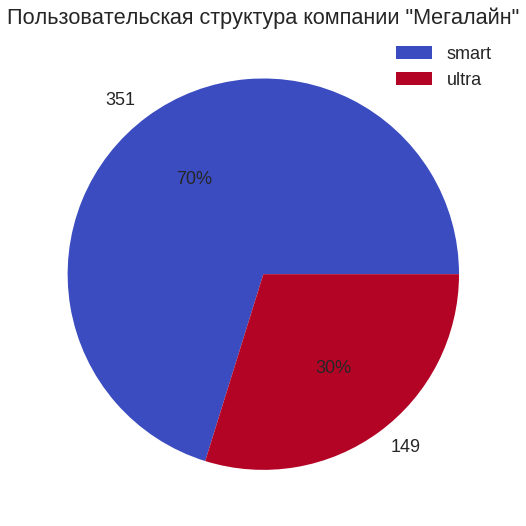

In [68]:
# определим пользовательскую структуру компании "Мегалайн"
users.groupby('tariff')['tariff'].agg('count')\
                                 .plot(kind = 'pie',
                                       labels = users.groupby('tariff')['tariff'].agg('count'),
                                       label = '',
                                       cmap = 'coolwarm',
                                       autopct = '%1.0f%%',
                                       legend = True,
                                       figsize = (9, 9),
                                       title='Пользовательская структура компании "Мегалайн"')
plt.legend(tariffs['tariff'], loc = 1)
plt.show()

Из 500 пользователей из нашей совокупности 351 (70%) пользуются тарифным планом "Смарт", остальные (149 - 30%) тарифным планом "Ультра".

In [69]:
# создадим отдельные таблицы для разных тарифных планов
df_smart = df.query('tariff == "smart"')
df_ultra = df.query('tariff == "ultra"')

Проведем анализ израсходованных минут разговора в месяц.

In [70]:
# посчитаем статистические показатели израсходованных минут разговора в месяц
df.groupby('tariff')\
  .agg({'duration_of_calls_month':['mean', 'median', 'max', 'var','std']})\
  .style.format("{:.2f}")

In [71]:
# определим долю превышения бесплатного лимита израсходованных минут разговора в месяц 
# на тарифном плане "smart" 
(df_smart.query('duration_of_calls_month > minutes_included')['duration_of_calls_month']\
          .count() / len(df_smart) * 100).round(1).astype(str) + '%'

'33.8%'

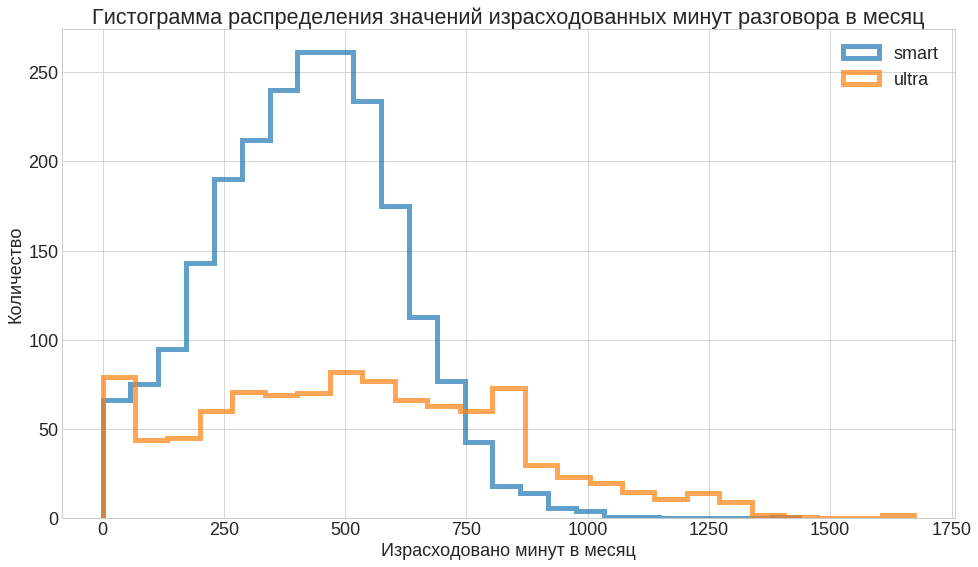

In [72]:
# построим гистограмму распределения значений израсходованных минут разговора в месяц
ax = df_smart.plot(kind = 'hist',
                   y = 'duration_of_calls_month',
                   histtype = 'step',
                   bins = 25,
                   linewidth = 5,
                   alpha = 0.7,
                   label = 'smart')
df_ultra.plot(kind = 'hist',
              y = 'duration_of_calls_month',
              histtype = 'step',
              bins = 25,
              linewidth = 5,
              alpha = 0.7,
              figsize = (16, 9),
              label = 'ultra',
              ax = ax,
              grid = True,
              legend = True)
plt.title('Гистограмма распределения значений израсходованных минут разговора в месяц')
plt.xlabel('Израсходовано минут в месяц')
plt.ylabel('Количество')
plt.show()

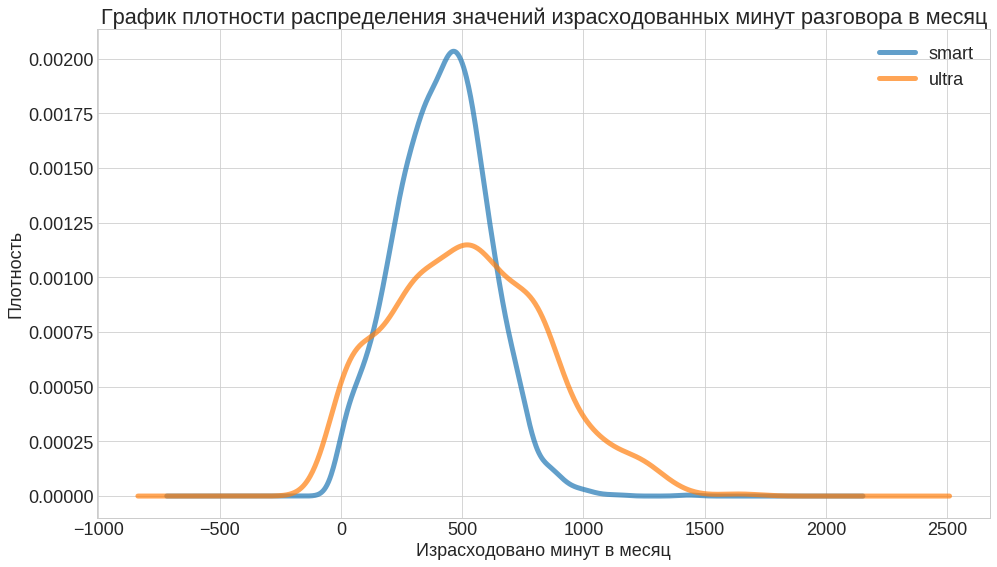

In [73]:
# построим график плотности распределения значений израсходованных минут разговора в месяц
ax = df_smart.plot(kind = 'density',
                   y = 'duration_of_calls_month',
                   linewidth = 5,
                   alpha = 0.7,
                   label = 'smart')
df_ultra.plot(kind = 'density',
              y = 'duration_of_calls_month',
              linewidth = 5,
              alpha = 0.7,
              figsize = (16, 9),
              label = 'ultra',
              ax = ax,
              grid = True,
              legend = True)
plt.title('График плотности распределения значений израсходованных минут разговора в месяц')
plt.xlabel('Израсходовано минут в месяц')
plt.ylabel('Плотность')
plt.show()

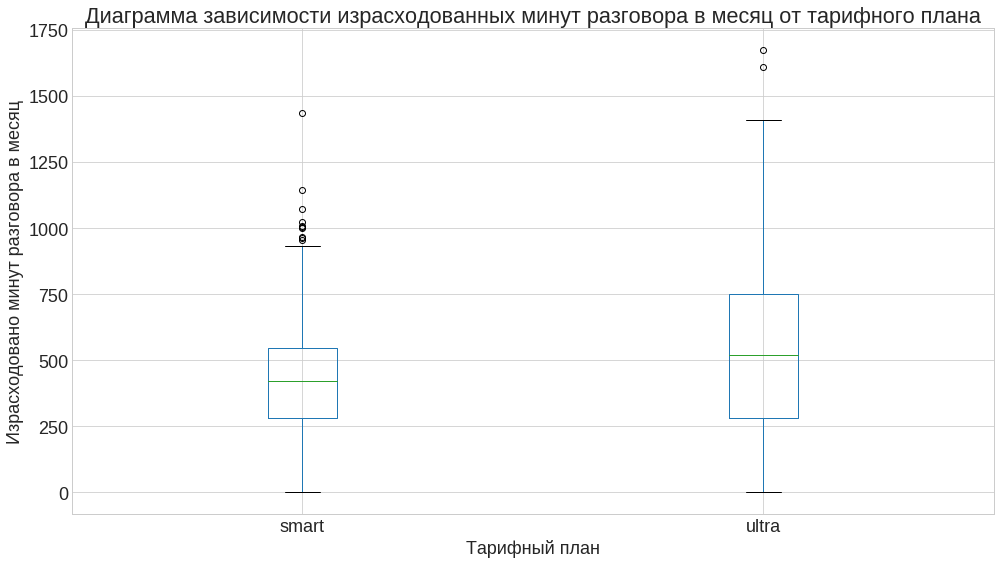

In [74]:
# построим диаграмму зависимости израсходованных минут разговора в месяц от тарифного плана
df.boxplot('duration_of_calls_month', by='tariff', figsize=(16,9))
plt.xlabel('Тарифный план')
plt.ylabel('Израсходовано минут разговора в месяц')
plt.title('Диаграмма зависимости израсходованных минут разговора в месяц от тарифного плана')
plt.suptitle('')
plt.show()

Распределения значений израсходованных минут разговора в месяц на разных тарифных планах имеют различия. Оба распределения близки к нормальному (среднее арифметическое практически равно медиане), однако дисперсия значений на тарифном плане "Ультра" значительно выше. В среднем на тарифном плане "Ультра" количество минут разговора в месяц больше, чем на тарифном плане "Смарт", что логично, так как на тарифном плане "Ультра" лимит разговоров, включенных в абонентскую плату, значительно выше. В то же время пользователи на тарифном плане "Ультра" в течение года ни разу не допустили превышения включенного в абонентскую плату лимита разговоров, тогда как пользователи на тарифном плане "Смарт" этот лимит превышали регулярно (в 33,8% в течение года).

Проведем анализ израсходованных количества отправленных сообщений в месяц.

In [75]:
# посчитаем статистические показатели количества отправленных сообщений в месяц
df.groupby('tariff')\
  .agg({'number_of_messages_month':['mean', 'median', 'max', 'var','std']})\
  .style.format("{:.2f}")

In [76]:
# определим долю превышения бесплатного лимита количества отправленных сообщений в месяц 
# на тарифном плане "smart" 
(df_smart.query('number_of_messages_month > messages_included')['number_of_messages_month']\
          .count() / len(df_smart) * 100).round(1).astype(str) + '%'

'25.3%'

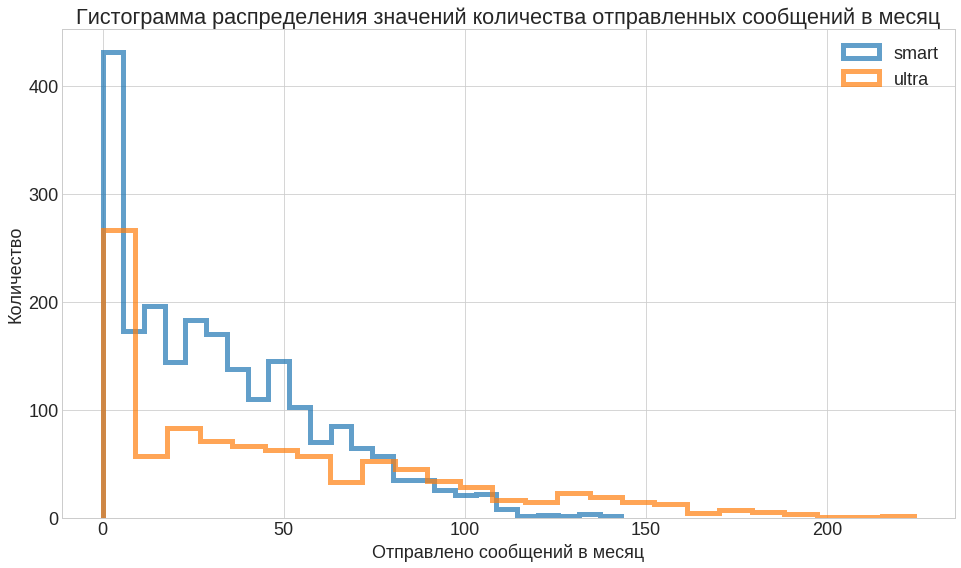

In [77]:
# построим гистограмму распределения значений количества отправленных сообщений в месяц
ax = df_smart.plot(kind = 'hist',
                   y = 'number_of_messages_month',
                   histtype = 'step',
                   bins = 25,
                   linewidth = 5,
                   alpha = 0.7,
                   label = 'smart')
df_ultra.plot(kind = 'hist',
              y = 'number_of_messages_month',
              histtype = 'step',
              bins = 25,
              linewidth = 5,
              alpha = 0.7,
              figsize = (16, 9),
              label = 'ultra',
              ax = ax,
              grid = True,
              legend = True)
plt.title('Гистограмма распределения значений количества отправленных сообщений в месяц')
plt.xlabel('Отправлено сообщений в месяц')
plt.ylabel('Количество')
plt.show()

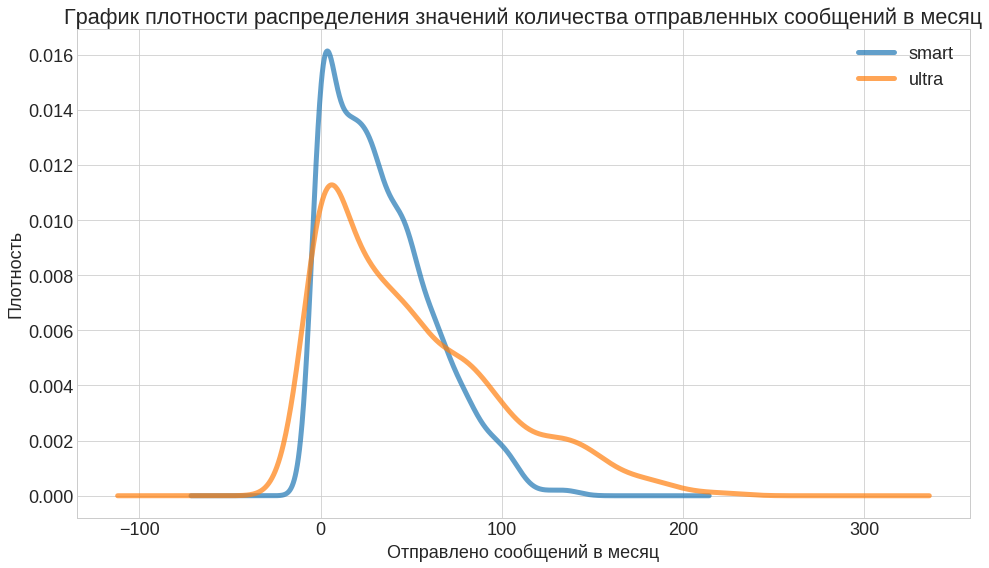

In [78]:
# построим график плотности распределения значений количества отправленных сообщений в месяц
ax = df_smart.plot(kind = 'density',
                   y = 'number_of_messages_month',
                   linewidth = 5,
                   alpha = 0.7,
                   label = 'smart')
df_ultra.plot(kind = 'density',
              y = 'number_of_messages_month',
              linewidth = 5,
              alpha = 0.7,
              figsize = (16, 9),
              label = 'ultra',
              ax = ax,
              grid = True,
              legend = True)
plt.title('График плотности распределения значений количества отправленных сообщений в месяц')
plt.xlabel('Отправлено сообщений в месяц')
plt.ylabel('Плотность')
plt.show()

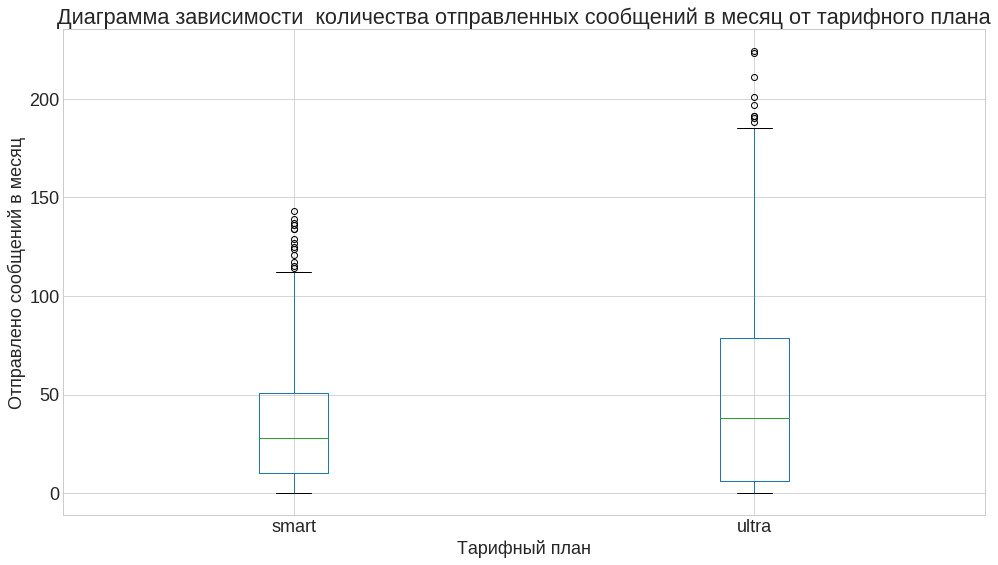

In [79]:
# построим диаграмму зависимости количества отправленных сообщений в месяц от тарифного плана
df.boxplot('number_of_messages_month', by='tariff', figsize=(16,9))
plt.xlabel('Тарифный план')
plt.ylabel('Отправлено сообщений в месяц')
plt.title('Диаграмма зависимости  количества отправленных сообщений в месяц от тарифного плана')
plt.suptitle('')
plt.show()

Распределения значений количества отправленных сообщений в месяц на разных тарифных планах имеют различия. Оба распределения близки к нормальному со скошенностью вправо (среднее арифметическое больше медианы), однако дисперсия значений на тарифном плане "Ультра" значительно выше. В среднем на тарифном плане "Ультра" количество отправленных сообщений в месяц больше, чем на тарифном плане "Смарт", что логично, так как на тарифном плане "Ультра" лимит сообщений, включенных в абонентскую плату, значительно выше. В то же время пользователи на тарифном плане "Ультра" в течение года ни разу не допустили превышения включенного в абонентскую плату лимита сообщений, тогда как пользователи на тарифном плане "Смарт" этот лимит превышали регулярно (в 25,3% в течение года).   
Обращает на себя внимание неадекватно большой лимит сообщений, включенных в абонентскую плату, на тарифном плане "Ультра". Так при установленном лимите в 1000 сообщений в месяц максимально пользователями было отправлено всего 224 сообщения.

Проведем анализ объема израсходованного интернет-трафика в месяц.

In [80]:
# посчитаем статистические показатели объема израсходованного интернет-трафика в месяц
df.groupby('tariff')\
  .agg({'mb_used_month':['mean', 'median', 'max', 'var','std']})\
  .style.format("{:.2f}")

In [81]:
# определим долю превышения бесплатного лимита объема израсходованного интернет-трафика в месяц 
# на тарифных планах "smart" и "ultra"
((df_smart.query('mb_used_month > mb_per_month_included')['mb_used_month']\
          .count() / len(df_smart) * 100).round(1).astype(str) + '%',
(df_ultra.query('mb_used_month > mb_per_month_included')['mb_used_month']\
          .count() / len(df_ultra) * 100).round(1).astype(str) + '%')

('58.7%', '13.6%')

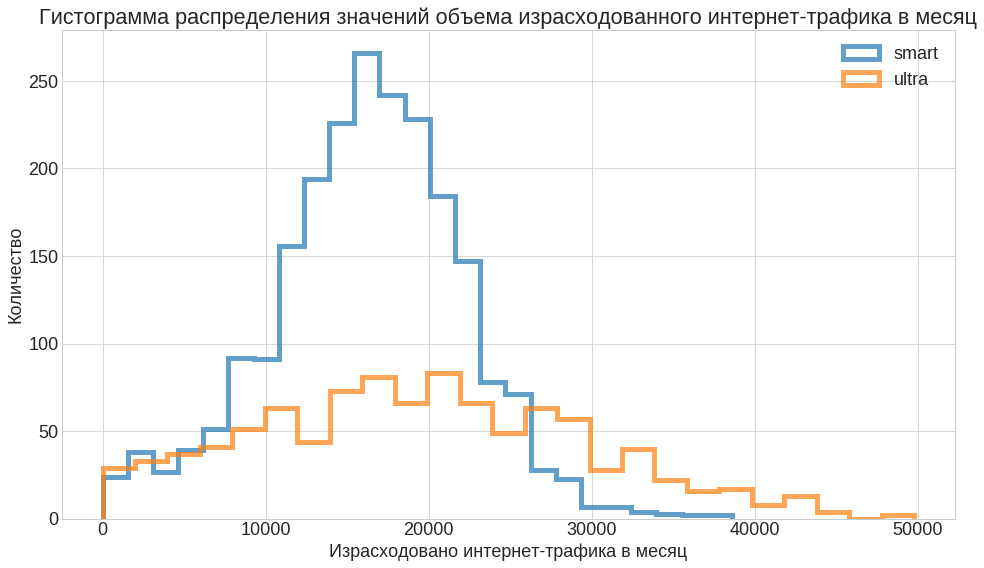

In [82]:
# построим гистограмму распределения значений объема израсходованного интернет-трафика в месяц
ax = df_smart.plot(kind = 'hist',
                   y = 'mb_used_month',
                   histtype = 'step',
                   bins = 25,
                   linewidth = 5,
                   alpha = 0.7,
                   label = 'smart')
df_ultra.plot(kind = 'hist',
              y = 'mb_used_month',
              histtype = 'step',
              bins = 25,
              linewidth = 5,
              alpha = 0.7,
              figsize = (16, 9),
              label = 'ultra',
              ax = ax,
              grid = True,
              legend = True)
plt.title('Гистограмма распределения значений объема израсходованного интернет-трафика в месяц')
plt.xlabel('Израсходовано интернет-трафика в месяц')
plt.ylabel('Количество')
plt.show()

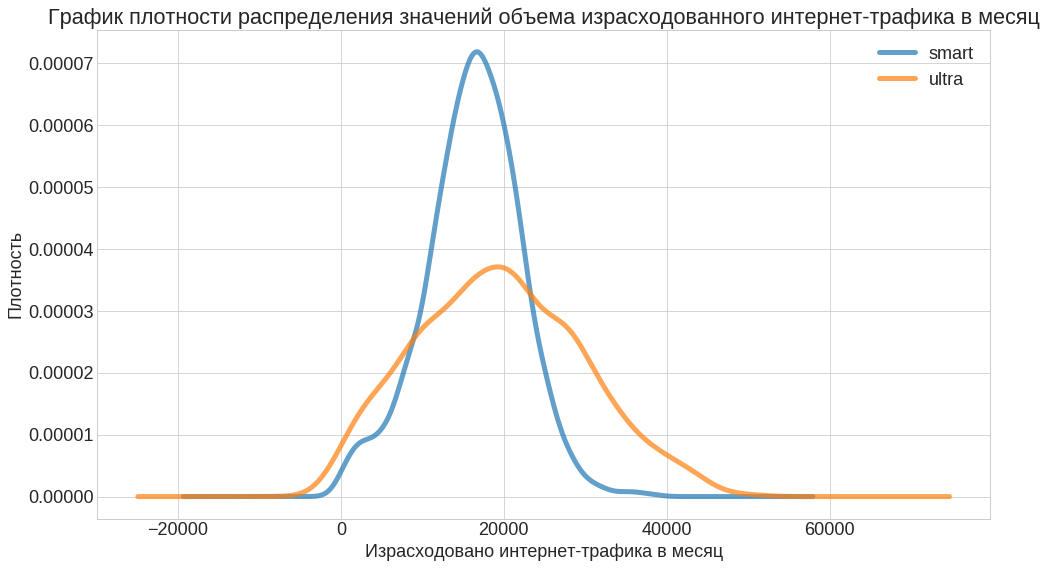

In [83]:
# построим график плотности распределения значений объема израсходованного интернет-трафика в месяц
ax = df_smart.plot(kind = 'density',
                   y = 'mb_used_month',
                   linewidth = 5,
                   alpha = 0.7,
                   label = 'smart')
df_ultra.plot(kind = 'density',
              y = 'mb_used_month',
              linewidth = 5,
              alpha = 0.7,
              figsize = (16, 9),
              label = 'ultra',
              ax = ax,
              grid = True,
              legend = True)
plt.title('График плотности распределения значений объема израсходованного интернет-трафика в месяц')
plt.xlabel('Израсходовано интернет-трафика в месяц')
plt.ylabel('Плотность')
plt.show()

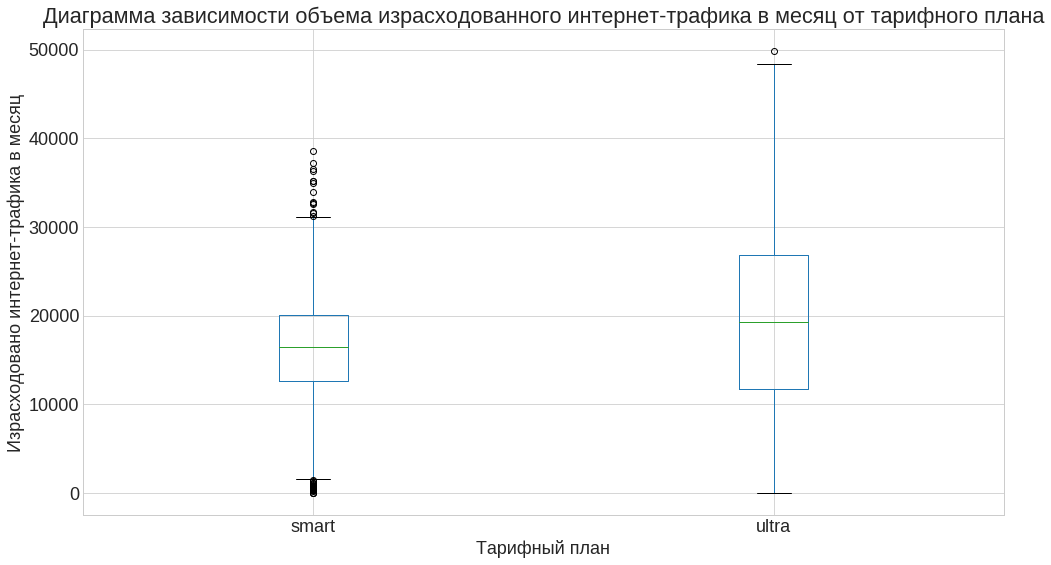

In [84]:
# построим диаграмму зависимости объема израсходованного интернет-трафика в месяц от тарифного плана
df.boxplot('mb_used_month', by='tariff', figsize=(16,9))
plt.xlabel('Тарифный план')
plt.ylabel('Израсходовано интернет-трафика в месяц')
plt.title('Диаграмма зависимости объема израсходованного интернет-трафика в месяц от тарифного плана')
plt.suptitle('')
plt.show()

Распределения значений объема израсходованного интернет-трафика в месяц на разных тарифных планах имеют различия. Оба распределения близки к нормальному (среднее арифметическое практически равно медиане), однако дисперсия значений на тарифном плане "Ультра" значительно выше. В среднем на тарифном плане "Ультра" объем израсходованного интернет-трафика в месяц больше, чем на тарифном плане "Смарт", что логично, так как на тарифном плане "Ультра" лимит  интернет-трафика, включенного в абонентскую плату, значительно выше. В то же время пользователи на тарифном плане "Ультра" в течение года всего в 13,6% случаев допустили превышение включенного в абонентскую плату лимита  интернет-трафика, тогда как пользователи на тарифном плане "Смарт" этот лимит превышали в большинстве случаев (в 58,7% в течение года).

Проведем анализ оплаты сверх абонентской платы в месяц.

In [85]:
# посчитаем статистические показатели оплаты сверх абонентской платы в месяц
df.groupby('tariff')\
  .agg({'fee_above_tariff':['mean', 'median', 'max', 'var','std']})\
  .style.format("{:.2f}")

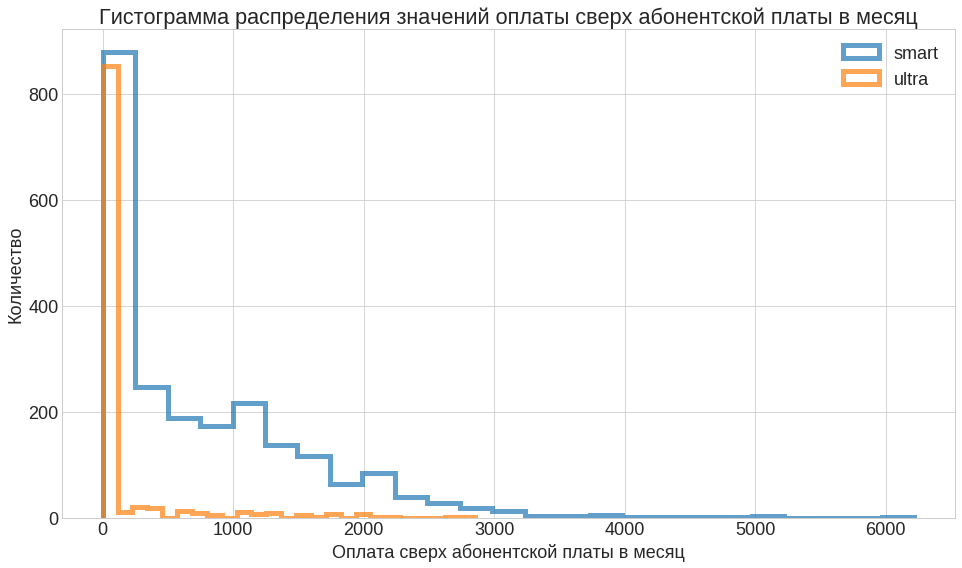

In [86]:
# построим гистограмму распределения значений оплаты сверх абонентской платы в месяц
ax = df_smart.plot(kind = 'hist',
                   y = 'fee_above_tariff',
                   histtype = 'step',
                   bins = 25,
                   linewidth = 5,
                   alpha = 0.7,
                   label = 'smart')
df_ultra.plot(kind = 'hist',
              y = 'fee_above_tariff',
              histtype = 'step',
              bins = 25,
              linewidth = 5,
              alpha = 0.7,
              figsize = (16, 9),
              label = 'ultra',
              ax = ax,
              grid = True,
              legend = True)
plt.title('Гистограмма распределения значений оплаты сверх абонентской платы в месяц')
plt.xlabel('Оплата сверх абонентской платы в месяц')
plt.ylabel('Количество')
plt.show()

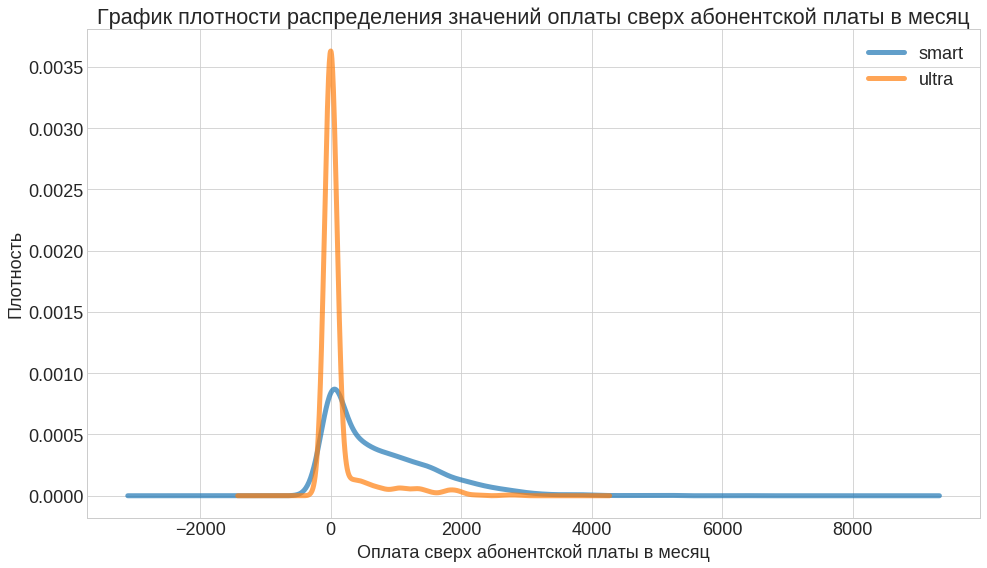

In [87]:
# построим график плотности распределения значений оплаты сверх абонентской платы в месяц
ax = df_smart.plot(kind = 'density',
                   y = 'fee_above_tariff',
                   linewidth = 5,
                   alpha = 0.7,
                   label = 'smart')
df_ultra.plot(kind = 'density',
              y = 'fee_above_tariff',
              linewidth = 5,
              alpha = 0.7,
              figsize = (16, 9),
              label = 'ultra',
              ax = ax,
              grid = True,
              legend = True)
plt.title('График плотности распределения значений оплаты сверх абонентской платы в месяц')
plt.xlabel('Оплата сверх абонентской платы в месяц')
plt.ylabel('Плотность')
plt.show()

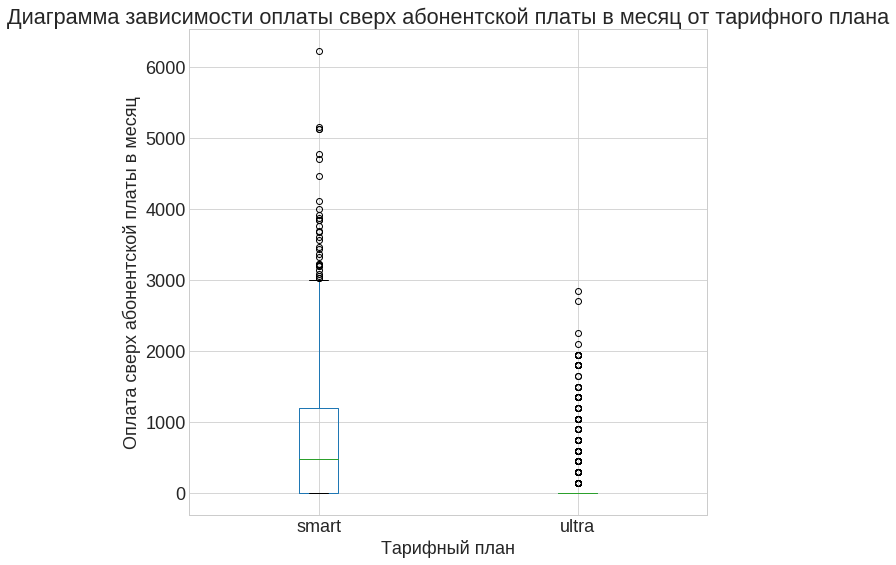

In [88]:
# построим диаграмму зависимости оплаты сверх абонентской платы в месяц от тарифного плана
df.boxplot('fee_above_tariff', by='tariff', figsize=(9,9))
plt.xlabel('Тарифный план')
plt.ylabel('Оплата сверх абонентской платы в месяц')
plt.title('Диаграмма зависимости оплаты сверх абонентской платы в месяц от тарифного плана')
plt.suptitle('')
plt.show()

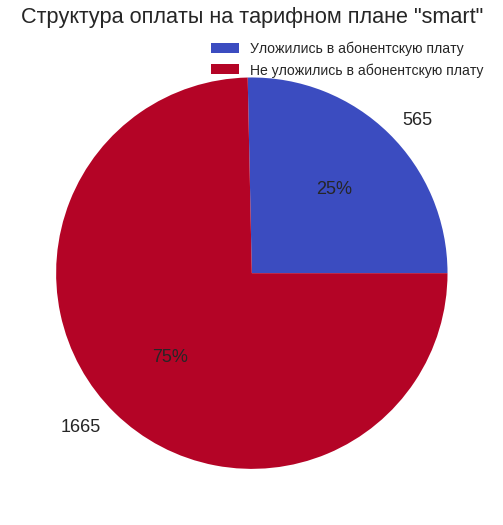

In [89]:
# определим структуру оплаты на тарифном плане "smart"
a = df_smart.loc[(df_smart['total_revenue'] == 550), 'total_revenue'].count()
b = df_smart.loc[(df_smart['total_revenue'] > 550), 'total_revenue'].count()
ab= pd.DataFrame({'status' : ['Уложились в абонентскую плату', 'Не уложились в абонентскую плату'],
                  'number_of_users' : [a, b]})
ab.plot(kind = 'pie',
        y ='number_of_users',
        labels = ab['number_of_users'],
        label = '',
        cmap = 'coolwarm',
        autopct = '%1.0f%%',
        legend = True,
        figsize = (9, 9),
        title = 'Структура оплаты на тарифном плане "smart"')
plt.legend(ab['status'], loc = 1, fontsize = 14)
plt.show()

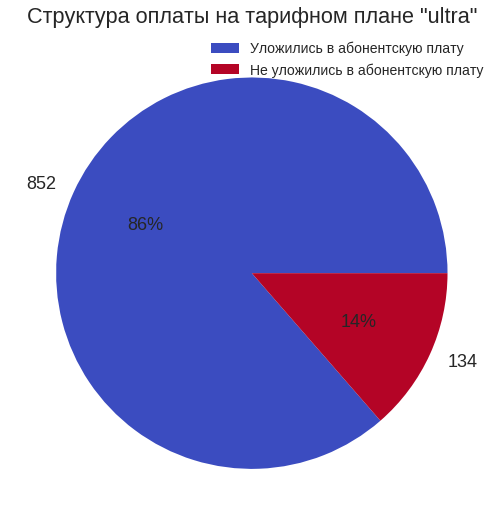

In [90]:
# определим структуру оплаты на тарифном плане "ultra"
a = df_ultra.loc[(df_ultra['total_revenue'] == 1950), 'total_revenue'].count()
b = df_ultra.loc[(df_ultra['total_revenue'] > 1950), 'total_revenue'].count()
ab= pd.DataFrame({'status' : ['Уложились в абонентскую плату', 'Не уложились в абонентскую плату'],
                  'number_of_users' : [a, b]})
ab.plot(kind = 'pie',
        y ='number_of_users',
        labels = ab['number_of_users'],
        label = '',
        cmap = 'coolwarm',
        autopct = '%1.0f%%',
        legend = True,
        figsize = (9, 9),
        title = 'Структура оплаты на тарифном плане "ultra"')
plt.legend(ab['status'], loc = 1, fontsize = 14)
plt.show()

Распределения значений оплаты сверх абонентской платы в месяц на разных тарифных планах имеют различия. Оба распределения близки к нормальному со скошенностью вправо (среднее арифметическое больше медианы), однако дисперсия значений на тарифном плане "Смарт" значительно выше. На тарифном плане "Ультра" всего в 14% случаев пользователи не уложились в абонентскую плату, тогда как на тарифном плане "Смарт" в абонентскую плату уложилась только четверть пользователей.

Проведем анализ общей выручки в месяц.

In [91]:
# посчитаем статистические показатели общей выручки в месяц
df.groupby('tariff')\
  .agg({'total_revenue':['mean', 'median', 'max', 'var','std']})\
  .style.format("{:.2f}")

In [92]:
(df_ultra['total_revenue'].mean()/df_smart['total_revenue'].mean()).round(2)

1.6

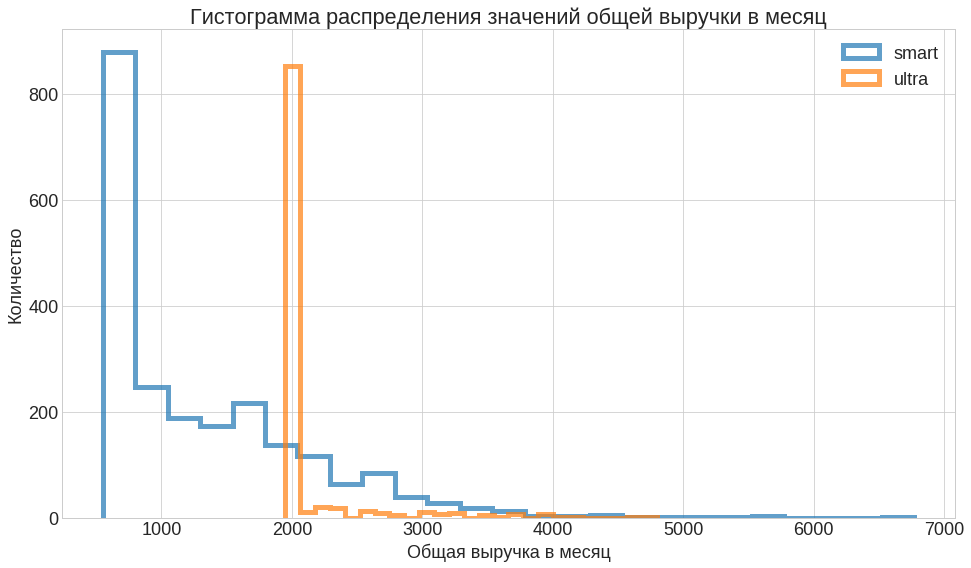

In [93]:
# построим гистограмму распределения значений общей выручки в месяц
ax = df_smart.plot(kind = 'hist',
                   y = 'total_revenue',
                   histtype = 'step',
                   bins = 25,
                   linewidth = 5,
                   alpha = 0.7,
                   label = 'smart')
df_ultra.plot(kind = 'hist',
              y = 'total_revenue',
              histtype = 'step',
              bins = 25,
              linewidth = 5,
              alpha = 0.7,
              figsize = (16, 9),
              label = 'ultra',
              ax = ax,
              grid = True,
              legend = True)
plt.title('Гистограмма распределения значений общей выручки в месяц')
plt.xlabel('Общая выручка в месяц')
plt.ylabel('Количество')
plt.show()

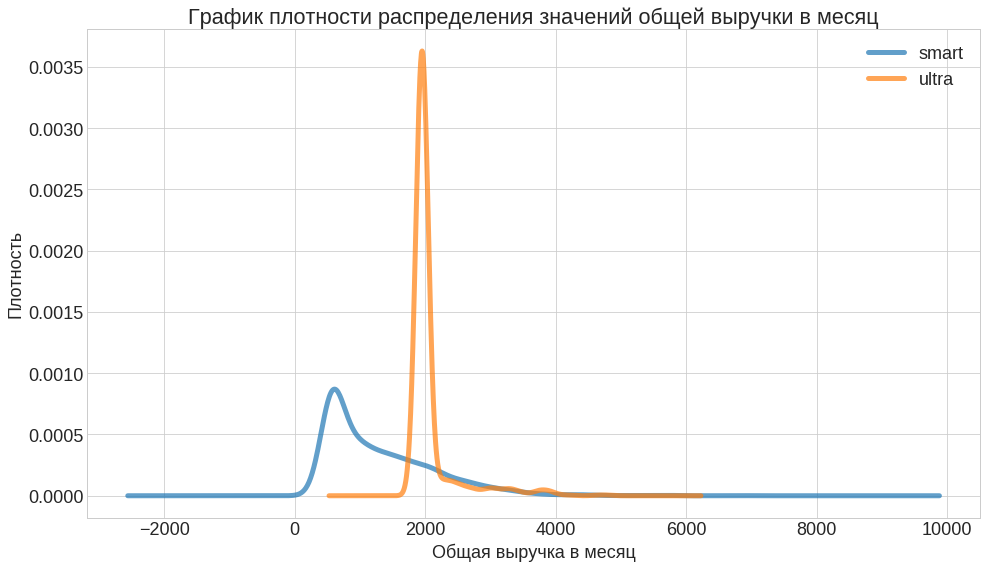

In [94]:
# построим график плотности распределения значений общей выручки в месяц
ax = df_smart.plot(kind = 'density',
                   y = 'total_revenue',
                   linewidth = 5,
                   alpha = 0.7,
                   label = 'smart')
df_ultra.plot(kind = 'density',
              y = 'total_revenue',
              linewidth = 5,
              alpha = 0.7,
              figsize = (16, 9),
              label = 'ultra',
              ax = ax,
              grid = True,
              legend = True)
plt.title('График плотности распределения значений общей выручки в месяц')
plt.xlabel('Общая выручка в месяц')
plt.ylabel('Плотность')
plt.show()

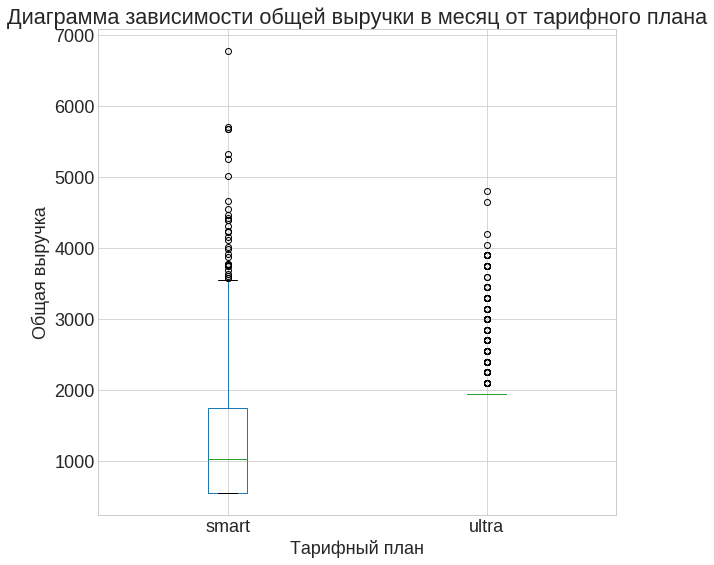

In [95]:
# построим диаграмму зависимости общей выручки в месяц от тарифного плана
df.boxplot('total_revenue', by='tariff', figsize=(9,9))
plt.xlabel('Тарифный план')
plt.ylabel('Общая выручка')
plt.title('Диаграмма зависимости общей выручки в месяц от тарифного плана')
plt.suptitle('')
plt.show()

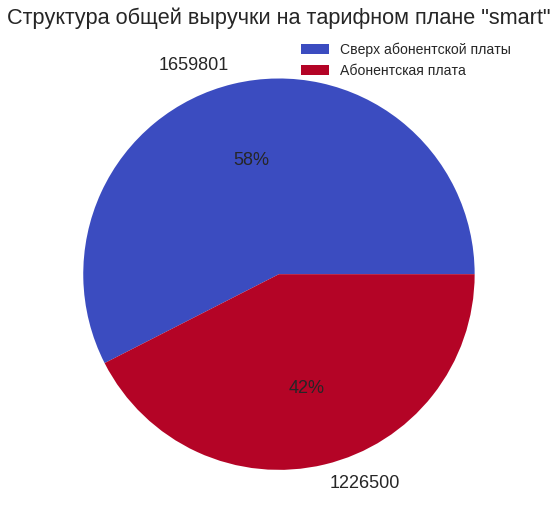

In [96]:
# определим структуру общей выручки на тарифном плане "smart"
a = df_smart['fee_above_tariff'].sum()
b = df_smart['rub_monthly_fee'].sum()
ab= pd.DataFrame({'revenue' : ['Сверх абонентской платы', 'Абонентская плата'],
                  'sum' : [a, b]})
ab.plot(kind = 'pie',
        y ='sum',
        labels = ab['sum'],
        label = '',
        cmap = 'coolwarm',
        autopct = '%1.0f%%',
        legend = True,
        figsize = (9, 9),
        title = 'Структура общей выручки на тарифном плане "smart"')
plt.legend(ab['revenue'], loc = 1, fontsize = 14)
plt.show()

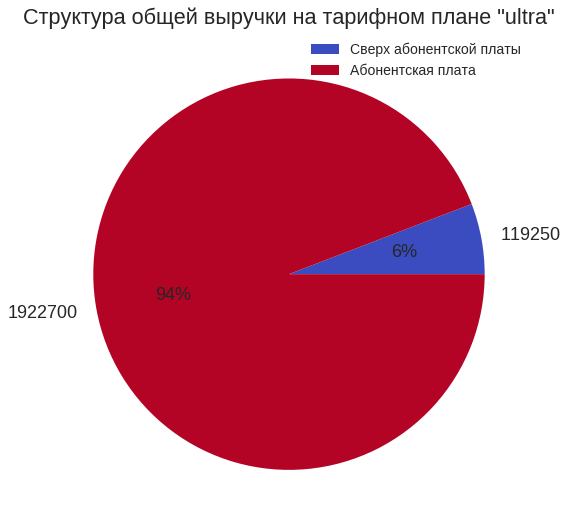

In [97]:
# определим структуру общей выручки на тарифном плане "ultra"
a = df_ultra['fee_above_tariff'].sum()
b = df_ultra['rub_monthly_fee'].sum()
ab= pd.DataFrame({'revenue' : ['Сверх абонентской платы', 'Абонентская плата'],
                  'sum' : [a, b]})
ab.plot(kind = 'pie',
        y ='sum',
        labels = ab['sum'],
        label = '',
        cmap = 'coolwarm',
        autopct = '%1.0f%%',
        legend = True,
        figsize = (9, 9),
        title = 'Структура общей выручки на тарифном плане "ultra"')
plt.legend(ab['revenue'], loc = 1, fontsize = 14)
plt.show()

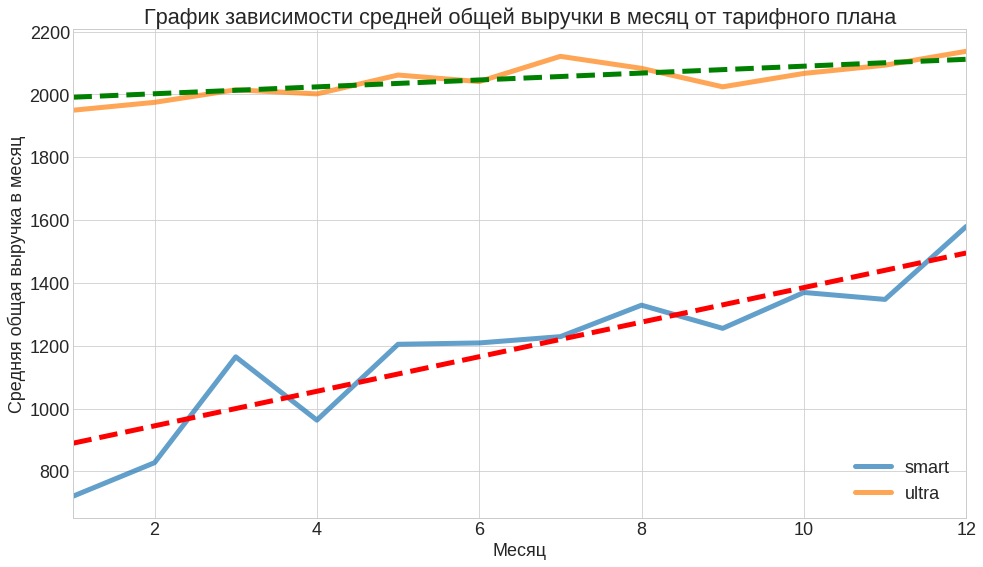

In [98]:
# построим график зависимости средней общей выручки в месяц от тарифного плана по месяцам
df_smart.groupby('month')['total_revenue'].mean()\
                                          .plot(kind = 'line',
                                                label = 'smart',
                                                figsize = (16, 9),
                                                linewidth = 5,
                                                alpha = 0.7,
                                                legend = True)
df_ultra.groupby('month')['total_revenue'].mean()\
                                          .plot(kind = 'line',
                                                label = 'ultra',
                                                figsize = (16, 9),
                                                linewidth = 5,
                                                alpha = 0.7,
                                                legend = True)
plt.xlabel('Месяц')
plt.ylabel('Средняя общая выручка в месяц')
plt.grid(True)
plt.title('График зависимости средней общей выручки в месяц от тарифного плана')
z = np.polyfit(df_smart['month'], df_smart['total_revenue'], 1)
p = np.poly1d(z)
plt.plot(df_smart['month'], p(df_smart['month']),"r--", linewidth = 5)
y = np.polyfit(df_ultra['month'], df_ultra['total_revenue'], 1)
r = np.poly1d(y)
plt.plot(df_ultra['month'], r(df_ultra['month']),"g--", linewidth = 5)
plt.show()

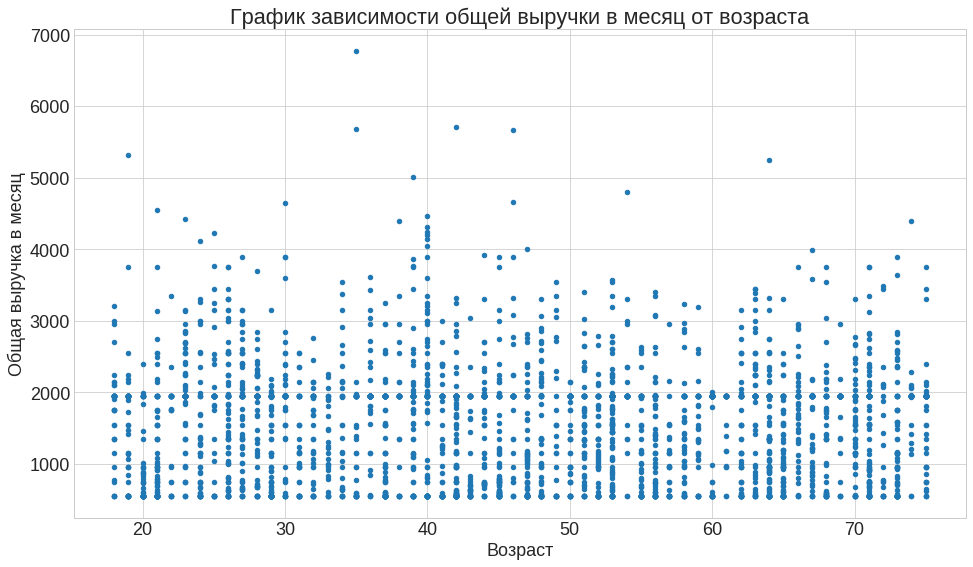

In [99]:
# построим график зависимости общей выручки в месяц от возраста
df.plot(x = 'age',
        y = 'total_revenue',
        kind = 'scatter',
        figsize = (16, 9))
plt.xlabel('Возраст')
plt.ylabel('Общая выручка в месяц')
plt.grid(True)
plt.title('График зависимости общей выручки в месяц от возраста')
plt.show()

In [100]:
# выделим 10 городов с максимальной общей выручкой
top_city = df.pivot_table(index = 'city',
                          values = 'total_revenue',
                          aggfunc = ('mean', 'sum'))\
             .sort_values(by = 'sum',
                          ascending = False)\
             .head(10)
top_city

,mean,sum
city,,
Москва,1550.805237,947542.0
Санкт-Петербург,1625.674074,438932.0
Новосибирск,1787.163265,175142.0
Уфа,1536.442105,145962.0
Краснодар,1544.069767,132790.0
Пермь,1589.647059,108096.0
Ульяновск,1282.963855,106486.0
Омск,1433.109589,104617.0
Нижний Новгород,1925.388889,103971.0


In [101]:
# создадим список из 10 городов с максимальной общей выручкой
top_list = top_city.reset_index().city.to_list()
top_list

['Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Уфа',
 'Краснодар',
 'Пермь',
 'Ульяновск',
 'Омск',
 'Нижний Новгород',
 'Набережные Челны']

In [102]:
# создадим столбец, в котором города, не входящие в 10 городов с максимальной общей выручкой,
# включим в группировку 'Другой' 
df['group_city'] = df['city'].where(df['city'].isin(top_list), 'Другой')
df.tail()

,month,user_id,first_name,last_name,age,city,fee_above_tariff,total_revenue,reg_date,churn_date,number_of_calls_month,duration_of_calls_month,number_of_messages_month,mb_used_month,tariff,rub_monthly_fee,minutes_included,messages_included,mb_per_month_included,rub_per_minute,rub_per_message,rub_per_gb,group_city
3211,12,1494,Ренат,Андропов,62,Омск,600,1150,2018-08-17,NaT,54,418,0,17645,smart,550,500,50,15360,3,3,200,Омск
3212,12,1495,Авксентий,Фокин,65,Иркутск,0,1950,2018-08-28,NaT,120,1031,84,23450,ultra,1950,3000,1000,30720,1,1,150,Другой
3213,12,1496,Трифон,Блохин,36,Вологда,1257,1807,2018-01-27,NaT,65,518,51,20757,smart,550,500,50,15360,3,3,200,Другой
3214,12,1497,Каролина,Агеева,32,Челябинск,1135,1685,2018-10-09,NaT,58,545,17,19940,smart,550,500,50,15360,3,3,200,Другой
3215,12,1499,Гектор,Корнилов,35,Пермь,48,598,2018-09-27,NaT,56,492,66,13077,smart,550,500,50,15360,3,3,200,Пермь


In [103]:
# создадим сводную таблицу с группировкой по названию города, переименуем в ней столбцы
top_group_city = df.pivot_table(index = 'group_city',
                                values = 'total_revenue',
                                aggfunc = ('mean', 'sum'))\
                   .sort_values(by = 'sum',\
                                ascending = False)
top_group_city = top_group_city.rename(columns = {'mean' : 'total_revenue_mean',
                                                  'sum' : 'total_revenue_sum'})
top_group_city[['total_revenue_mean',
                'total_revenue_sum']] = top_group_city[['total_revenue_mean',
                                                        'total_revenue_sum']].astype('int')
top_group_city

,total_revenue_mean,total_revenue_sum
group_city,,
Другой,1495,2563951
Москва,1550,947542
Санкт-Петербург,1625,438932
Новосибирск,1787,175142
Уфа,1536,145962
Краснодар,1544,132790
Пермь,1589,108096
Ульяновск,1282,106486
Омск,1433,104617


In [104]:
# проверим сумму общей выручки
(top_group_city['total_revenue_sum'].sum(), df['total_revenue'].sum())

(4928251, 4928251)

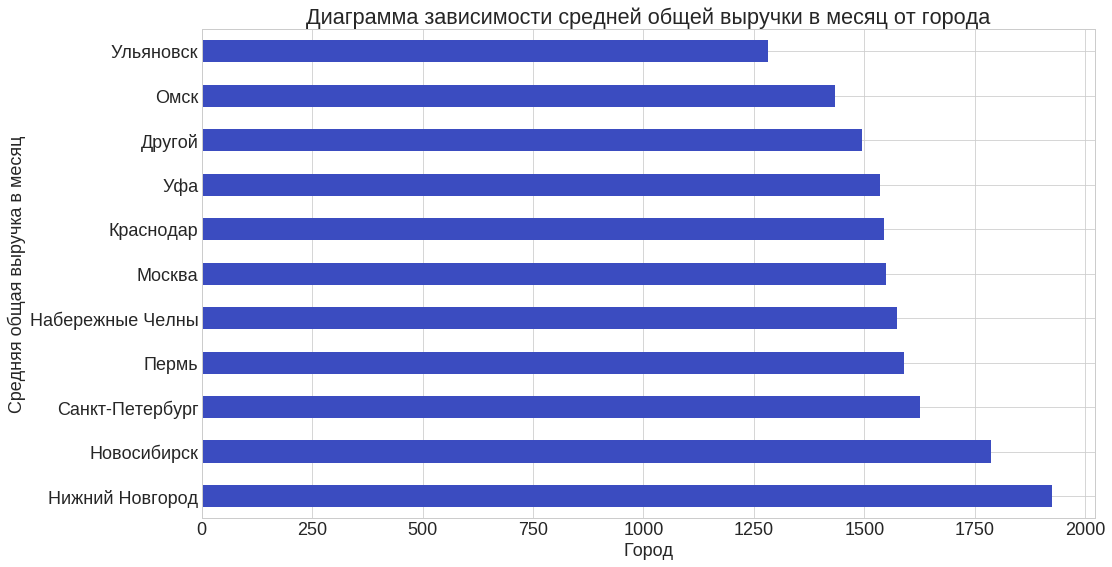

In [105]:
# построим диаграмму зависимости средней общей выручки в месяц от города
top_group_city.sort_values(by = 'total_revenue_mean',
                           ascending = False)\
              ['total_revenue_mean'].plot(kind = 'barh', 
                                          figsize = (16, 9),
                                          cmap = 'coolwarm') 
plt.xlabel('Город')
plt.ylabel('Средняя общая выручка в месяц')
plt.grid(True)
plt.title('Диаграмма зависимости средней общей выручки в месяц от города')
plt.show()

Распределения значений общей выручки в месяц на разных тарифных планах имеют различия. Оба распределения близки к нормальному со скошенностью вправо (среднее арифметическое больше медианы), однако дисперсия значений на тарифном плане "Смарт" значительно выше. В среднем один пользователь в месяц на тарифном плане "Ультра" приносит выручки на 60% больше, чем на тарифном плане "Супер". На тарифном плане "Ультра" 94% общей выручки составляет абонентская плата, тогда как на тарифном плане "Смарт" абонентская плата составляет всего 42% общей выручки.   
Проанализировав динамику средней общей выручки по месяцам, следует отметить, что она растет на обоих тарифных планах, однако на тарифном плане "Смарт" динамика роста выше.   
Зависимость общей выручки от возраста пользователя либо от города его проживания отсутствует.

### Вывод

1. Распределения значений израсходованных минут разговора, отправленных сообщений, объема израсходованного интернет-трафика, оплаты сверх абонентской платы, общей выручки на разных тарифных планах имеют различия. Все распределения близки к нормальному, при этом распределения  отправленных сообщений, оплаты сверх абонентской платы, общей выручки со скошенностью вправо. Дисперсия значений израсходованных минут разговора, отправленных сообщений, объема израсходованного интернет-трафика на тарифном плане "Ультра" значительно выше,  а значений оплаты сверх абонентской платы, общей выручки значительно выше на тарифном плане "Смарт".   
2. В среднем на тарифном плане "Ультра" количество израсходованных минут разговора и отправленных сообщений, а также объем израсходованного интернет-трафика в месяц больше, чем на тарифном плане "Смарт", так как на тарифном плане "Ультра" соответствующие лимиты, включенные в абонентскую плату, значительно выше.  
3. На тарифном плане "Ультра" неадекватно большой лимит сообщений, включенных в абонентскую плату. Так при установленном лимите в 1000 сообщений в месяц максимально пользователями было отправлено всего 224 сообщения.
4. В среднем один пользователь в месяц на тарифном плане "Ультра" приносит выручки на 60% больше, чем на тарифном плане "Супер". 
5. Пользователи на тарифном плане "Ультра" в течение года ни разу не допустили превышения включенного в абонентскую плату лимита разговоров и сообщений, тогда как пользователи на тарифном плане "Смарт" этот лимит превышали регулярно (соответственно в 33,8% и 25,3% в течение года). Превышение включенного в абонентскую плату лимита интернет-трафика пользователи на тарифном плане "Ультра" в течение года допустили в 13,6% случаев, тогда как пользователи на тарифном плане "Смарт" этот лимит превышали в большинстве случаев (в 58,7% в течение года).    
6. На тарифном плане "Ультра" всего в 14% случаев пользователи не уложились в абонентскую плату, тогда как на тарифном плане "Смарт" в абонентскую плату уложилась только четверть пользователей.    
7. На тарифном плане "Ультра" 94% общей выручки составляет абонентская плата, в то же время на тарифном плане "Смарт" абонентская плата составляет всего 42% общей выручки.   
8. Средняя общая выручка по месяцам растет на обоих тарифных планах, однако на тарифном плане "Смарт" динамика роста выше.   
9. Зависимость общей выручки от возраста пользователя либо от города его проживания отсутствует.

### Проверка гипотез
<a name="hypothesis"></a>

Перед проверкой гипотез необходимо избавиться от выбросов в имеющихся данных.

In [106]:
# создадим функцию для расчета значений, отклоняющихся от среднего арифметического значения 
# на 3 величины стандартного отклонения
def filtered_data(column):
    std = np.std(column)
    mean = column. mean()
    filtered = (column >= mean - 3 * std) & (column <= mean + 3 * std)
    return filtered

In [107]:
# применим функцию для столбца общей выручки в месяц
filtred_total_revenue = filtered_data(df['total_revenue'])

In [108]:
# создадим таблицу с данными по столбцу общей выручки в месяц без выбросов
good_df = df.copy()
good_df = df[filtred_total_revenue]
good_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3192 entries, 0 to 3215
Data columns (total 23 columns):
month                       3192 non-null int64
user_id                     3192 non-null int64
first_name                  3192 non-null object
last_name                   3192 non-null object
age                         3192 non-null int64
city                        3192 non-null object
fee_above_tariff            3192 non-null int64
total_revenue               3192 non-null int64
reg_date                    3192 non-null datetime64[ns]
churn_date                  188 non-null datetime64[ns]
number_of_calls_month       3192 non-null int64
duration_of_calls_month     3192 non-null int64
number_of_messages_month    3192 non-null int64
mb_used_month               3192 non-null int64
tariff                      3192 non-null object
rub_monthly_fee             3192 non-null int64
minutes_included            3192 non-null int64
messages_included           3192 non-null int64
mb_per_m

In [109]:
# создадим отдельные таблицы для разных тарифных планов без выбросов
good_df_smart = good_df.query('tariff == "smart"')
good_df_ultra = good_df.query('tariff == "ultra"')

In [110]:
# зададим критический уровень статистической значимости
alpha = 0.05

#### Гипотеза о равенстве средних двух генеральных совокупностей №1

Так как гипотезы всегда формулируются так, чтобы использовать знак равенства, сформулируем их следующим образом:   
H0 - средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается;   
H1 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.   


In [111]:
# посчитаем статистические показатели общей выручки в месяц
good_df.groupby('tariff')\
       .agg({'total_revenue':['mean', 'var','std', 'count']})\
       .style.format("{:.2f}")

Для проверки гипотез будем использовать t-критерий Стьюдента, так как исходные данные имеют нормальное распределение. Дисперсии совокупностей значительно отличаются, следовательно дисперсию каждой выборки оценим для каждой по отдельности по значениям в ней самой.

In [112]:
# проверим предположение о верности гипотезы H0
results = st.ttest_ind(good_df_ultra['total_revenue'],
                       good_df_smart['total_revenue'],
                       equal_var = False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 7.852035670223093e-296
Отвергаем нулевую гипотезу


Проверим полученный результат с использованием калькулятора Эвана Миллера.   
https://www.evanmiller.org/ab-testing/t-test.html#!1262.86/751.64/2210;2061.35/347.66/982@95

#### Гипотеза о равенстве средних двух генеральных совокупностей №2

Так как гипотезы всегда формулируются так, чтобы использовать знак равенства, сформулируем их следующим образом:   
H0 - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов;   
H1 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.   

In [113]:
# создадим отдельные таблицы для Москвы и прочих населенных пунктов
good_df['group_city'] = good_df['city'].where(good_df['city'] == 'Москва', 'Прочий')
moscow_city = good_df.query('group_city == "Москва"')
other_city = good_df.query('group_city == "Прочий"')

In [114]:
# посчитаем статистические показатели общей выручки в месяц
good_df.groupby('group_city')\
       .agg({'total_revenue':['mean', 'var','std', 'count']})\
       .style.format("{:.2f}")

In [115]:
# посчитаем стандартное отклонение значений общей выручки в месяц
good_df['total_revenue'].std()

751.0720075828813

Для проверки гипотез будем использовать t-критерий Стьюдента, так как исходные данные имеют нормальное распределение. Дисперсии совокупностей практически не отличаются, следовательно дисперсию каждой выборки оценим по объединённому датасету из двух выборок.

In [116]:
# проверим предположение о верности гипотезы H0
results = st.ttest_ind(moscow_city['total_revenue'], other_city['total_revenue'])
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.31115808400723943
Не получилось отвергнуть нулевую гипотезу


Проверим полученный результат с использованием калькулятора Эвана Миллера.   
https://www.evanmiller.org/ab-testing/t-test.html#!1536.27/751.07/608;1501.98/751.07/2584@95

### Вывод

Перед проверкой гипотез избавились от выбросов с использованием правила трёх сигм, так как распределение значений общей выручки близко к нормальному.   
Результаты проверки гипотез:
1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Установлены значимые различия между двумя выборками.
2. Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов. Полученное значение p-value говорит о том, что хотя средняя общая выручка для разных городов и неодинакова, с вероятностью в 31% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средней общей выручкой для разных городов.

### Общий вывод
<a name="conclusion"></a>

1. Распределения значений израсходованных минут разговора, отправленных сообщений, объема израсходованного интернет-трафика, оплаты сверх абонентской платы, общей выручки на разных тарифных планах имеют различия. Дисперсия значений израсходованных минут разговора, отправленных сообщений, объема израсходованного интернет-трафика на тарифном плане "Ультра" значительно выше,  а значений оплаты сверх абонентской платы, общей выручки значительно выше на тарифном плане "Смарт".   
2. В среднем на тарифном плане "Ультра" количество израсходованных минут разговора и отправленных сообщений, а также объем израсходованного интернет-трафика в месяц больше, чем на тарифном плане "Смарт".   
3. На тарифном плане "Ультра" неадекватно большой лимит сообщений, включенных в абонентскую плату.  
4. В среднем один пользователь в месяц на тарифном плане "Ультра" приносит выручки на 60% больше, чем на тарифном плане "Супер". 
5. Пользователи на тарифном плане "Ультра" в течение года ни разу не допустили превышения включенного в абонентскую плату лимита разговоров и сообщений, тогда как пользователи на тарифном плане "Смарт" этот лимит превышали регулярно. Превышение включенного в абонентскую плату лимита интернет-трафика допущено пользователями на обоих тарифных планах, при этом на тарифном плане "Смарт" этот лимит превышался в большинстве случаев.    
6. На тарифном плане "Ультра" всего в 14% случаев пользователи не уложились в абонентскую плату, тогда как на тарифном плане "Смарт" в абонентскую плату уложилась только четверть пользователей.    
7. На тарифном плане "Ультра" 94% общей выручки составляет абонентская плата, в то же время на тарифном плане "Смарт" абонентская плата составляет всего 42% общей выручки.   
8. Средняя общая выручка по месяцам растет на обоих тарифных планах, однако на тарифном плане "Смарт" динамика роста выше.   
9. Зависимость общей выручки от возраста пользователя либо от города его проживания отсутствует.
10. Средняя общая выручка пользователей тарифов «Ультра» и «Смарт» различается.   
11. Средняя общая выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

### Рекомендации
<a name="recommendations"></a>

1. Для компании выгоднее пользователи на тарифном плане "Ультра", так как они приносят выручки на 60% больше, следовательно  скорректировать рекламный бюджет нужно именно в этом направлении. В то же время есть возможность на этом тарифном плане уменьшить лимит количества сообщений, включенных в абонентскую плату.   
2. Пользователи на тарифном плане "Смарт" более чем в половине случаев превышают лимит включенного в абонентскую плату интернет-трафика. Поэтому имеет смысл разделить тарифный план "Смарт" на два, в одном из которых уменьшить лимит включенного в абонентскую плату интернет-трафика и соответственно уменьшить саму абонентскую плату, а во втором наоборот увеличить лимит включенного в абонентскую плату интернет-трафика и соответственно увеличить саму абонентскую плату. Это привлечет больше клиентов, так как люди в основном будут укладываться в абонентскую плату, не переплачивая за превышение лимитов.